In [1]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../")

%autoreload 2
from flowset import *

import polars as pl

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [2]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
        zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [3]:
#exprData = pd.read_csv("sccovid_data/de_comparison_Monocytes-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_all/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_Dendritic-cells-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = pd.read_csv("sccovid_data/de_comparison_T-cells-Immune-system/combined_de_result.tsv", header=0, index_col=None, sep="\t")
#exprData = exprData[exprData.p_val_adj < 0.05]
#exprData

exprData = pl.read_csv("sccovid_data/de_comparison_Monocytes;Immune system/combined_de_result.tsv", has_header=True, sep="\t", null_values=["NA"])
exprData = exprData.filter( pl.col("p_val_adj") < 0.05)
print(exprData)

#print(exprData.select("cluster").unique())

shape: (349, 25)
┌───────────┬───────────┬──────────┬───────┬─────┬────────────┬────────────┬────────────┬──────────┐
│ gene      ┆ p_val     ┆ avg_log2 ┆ pct.1 ┆ ... ┆ mean.cells ┆ sd.cells_a ┆ count_all. ┆ cluster  │
│ ---       ┆ ---       ┆ FC       ┆ ---   ┆     ┆ _asympt    ┆ sympt      ┆ cells_asym ┆ ---      │
│ str       ┆ f64       ┆ ---      ┆ f64   ┆     ┆ ---        ┆ ---        ┆ pt         ┆ str      │
│           ┆           ┆ f64      ┆       ┆     ┆ f64        ┆ f64        ┆ ---        ┆          │
│           ┆           ┆          ┆       ┆     ┆            ┆            ┆ i64        ┆          │
╞═══════════╪═══════════╪══════════╪═══════╪═════╪════════════╪════════════╪════════════╪══════════╡
│ ABCA1     ┆ 6.8714e-4 ┆ 0.635767 ┆ 0.523 ┆ ... ┆ 0.868175   ┆ 0.334164   ┆ 131        ┆ cluster. │
│           ┆ 0         ┆          ┆       ┆     ┆            ┆            ┆            ┆ tp01     │
├╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌

In [4]:
exprData.filter(pl.col("gene") == "IFI44L")

shape: (2, 25)
┌────────┬────────────┬──────────┬───────┬─────┬────────────┬────────────┬────────────┬────────────┐
│ gene   ┆ p_val      ┆ avg_log2 ┆ pct.1 ┆ ... ┆ mean.cells ┆ sd.cells_a ┆ count_all. ┆ cluster    │
│ ---    ┆ ---        ┆ FC       ┆ ---   ┆     ┆ _asympt    ┆ sympt      ┆ cells_asym ┆ ---        │
│ str    ┆ f64        ┆ ---      ┆ f64   ┆     ┆ ---        ┆ ---        ┆ pt         ┆ str        │
│        ┆            ┆ f64      ┆       ┆     ┆ f64        ┆ f64        ┆ ---        ┆            │
│        ┆            ┆          ┆       ┆     ┆            ┆            ┆ i64        ┆            │
╞════════╪════════════╪══════════╪═══════╪═════╪════════════╪════════════╪════════════╪════════════╡
│ IFI44L ┆ 8.0165e-8  ┆ -0.28486 ┆ 0.681 ┆ ... ┆ 1.985736   ┆ 0.470494   ┆ 131        ┆ cluster.tp │
│        ┆            ┆ 8        ┆       ┆     ┆            ┆            ┆            ┆ 01         │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ IFI44L ┆ 3.0653e-10 ┆ -0.38816 ┆ 0.359 ┆ ... ┆ 1.627667   ┆ 0.56889    ┆ 208        ┆ cluster.tp │
│        ┆            ┆ 5        ┆       ┆     ┆            ┆            ┆            ┆ 02         │
└────────┴────────────┴──────────┴───────┴─────┴────────────┴────────────┴────────────┴────────────┘

In [5]:
#explDFRaw, mfFuzzy = FlowAnalysis.exprDF2LongDF(exprData, mfLevels = ["ASYMPT", "asympt", "nodiff", "sympt", "SYMPT"], meancolName="avg_log2FC", sdcolName=None, exprcolName="pct.1", mfLevelsMirrored=True, shape="tri")
#explDF = FlowAnalysis.toFlowsDF(explDFRaw)

explDFRaw, mfFuzzy = FlowAnalysis.fuzzify_exprvalues(exprData, stepsize=0.1, seriesOrder=["cluster.tp01","cluster.tp02","cluster.tp03"], mfLevels = ["ASYMPT", "asympt", "nodiff", "sympt", "SYMPT"], centerMode="minmax",meancolName="avg_log2FC", sdcolName=None, exprcolName="pct.1", mfLevelsMirrored=True) #"cluster.thrombus"
explDFWide = FlowAnalysis.to_vwide(explDFRaw, mfFuzzy)
explDFWide

{'seriesOrder': ['cluster.tp01', 'cluster.tp02', 'cluster.tp03'], 'centerMode': 'minmax'}
-1.0 1.0
centers [-1.  -0.5  0.   0.5  1. ]
Creating Universe Range -1.0 -> 1.0 with step size 0.1
Mean Expr avg_log2FC col 2
Expr Count pct.1 col 3
SD None col None
Cluster cluster col 24
No SD col name given
5
No SD col name given
5
No SD col name given
5
cluster.tp01
cluster.tp02
cluster.tp03
shape: (5, 4)
┌────────────┬───────────────────────┬──────────────────────────────┬──────────────────────────────┐
│ gene       ┆ cluster.tp01          ┆ cluster.tp02                 ┆ cluster.tp03                 │
│ ---        ┆ ---                   ┆ ---                          ┆ ---                          │
│ str        ┆ list[f64]             ┆ list[f64]                    ┆ list[f64]                    │
╞════════════╪═══════════════════════╪══════════════════════════════╪══════════════════════════════╡
│ ABCA1      ┆ [0.0, 2.1183e-16, ... ┆ [0.0, 4.4409e-16, ... 0.0]   ┆ [0.0, 4.4409e-16, ... 0.

shape: (314, 16)
┌───┬────────────┬────────────┬────────────┬─────┬────────────┬────────────┬────────────┬────────────┐
│ g ┆ ASYMPT.clu ┆ asympt.clu ┆ nodiff.clu ┆ ... ┆ asympt.clu ┆ nodiff.clu ┆ sympt.clus ┆ SYMPT.clus │
│ e ┆ ster.tp01  ┆ ster.tp01  ┆ ster.tp01  ┆     ┆ ster.tp03  ┆ ster.tp03  ┆ ter.tp03   ┆ ter.tp03   │
│ n ┆ ---        ┆ ---        ┆ ---        ┆     ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ e ┆ f64        ┆ f64        ┆ f64        ┆     ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
│ - ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ - ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ - ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ s ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ t ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ r ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
╞═══╪════════════╪════════════╪════════════╪═════╪════════════╪════════════╪════════════╪════════════╡
│ A ┆ 0.0        ┆ 2.1183e-16 ┆ 0.477      ┆ ... ┆ 4.4409e-16 ┆ 1.0        ┆ 4.4409e-16 ┆ 0.0        │
│ B ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ C ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ A ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ A ┆ 0.0        ┆ 3.3484e-16 ┆ 0.870274   ┆ ... ┆ 4.4409e-16 ┆ 1.0        ┆ 4.4409e-16 ┆ 0.0        │
│ B ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ H ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ D ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 7 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ C ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ A ┆ 0.0        ┆ 3.3484e-16 ┆ 0.85719    ┆ ... ┆ 4.4409e-16 ┆ 1.0        ┆ 4.4409e-16 ┆ 0.0        │
│ C ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 0 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 6 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 8 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 3 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ . ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
│ 1 ┆            ┆            ┆            ┆     ┆            ┆            ┆            ┆            │
├╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ A ┆ 0.0        ┆ 2.9754e-16 ┆ 0.830618   ┆ ... ┆ 4.4409e-16 ┆ 1.0        ┆ 4.4409e-16 ┆ 0.0        │
│ D ┆            ┆            ┆            ┆     ┆            ┆      

In [6]:
#pd.set_option("display.max_rows", 200, "display.max_columns", 15)

In [7]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

In [8]:
fa = FlowAnalysis(explDFWide, "gene", (  ("tp01", "TP 1"),("tp02", "TP 2"),("tp03", "TP 3")), mfFuzzy) #("thrombus", "Thrombus"),

Creating FlowIDs


Figure Size (8, 10)


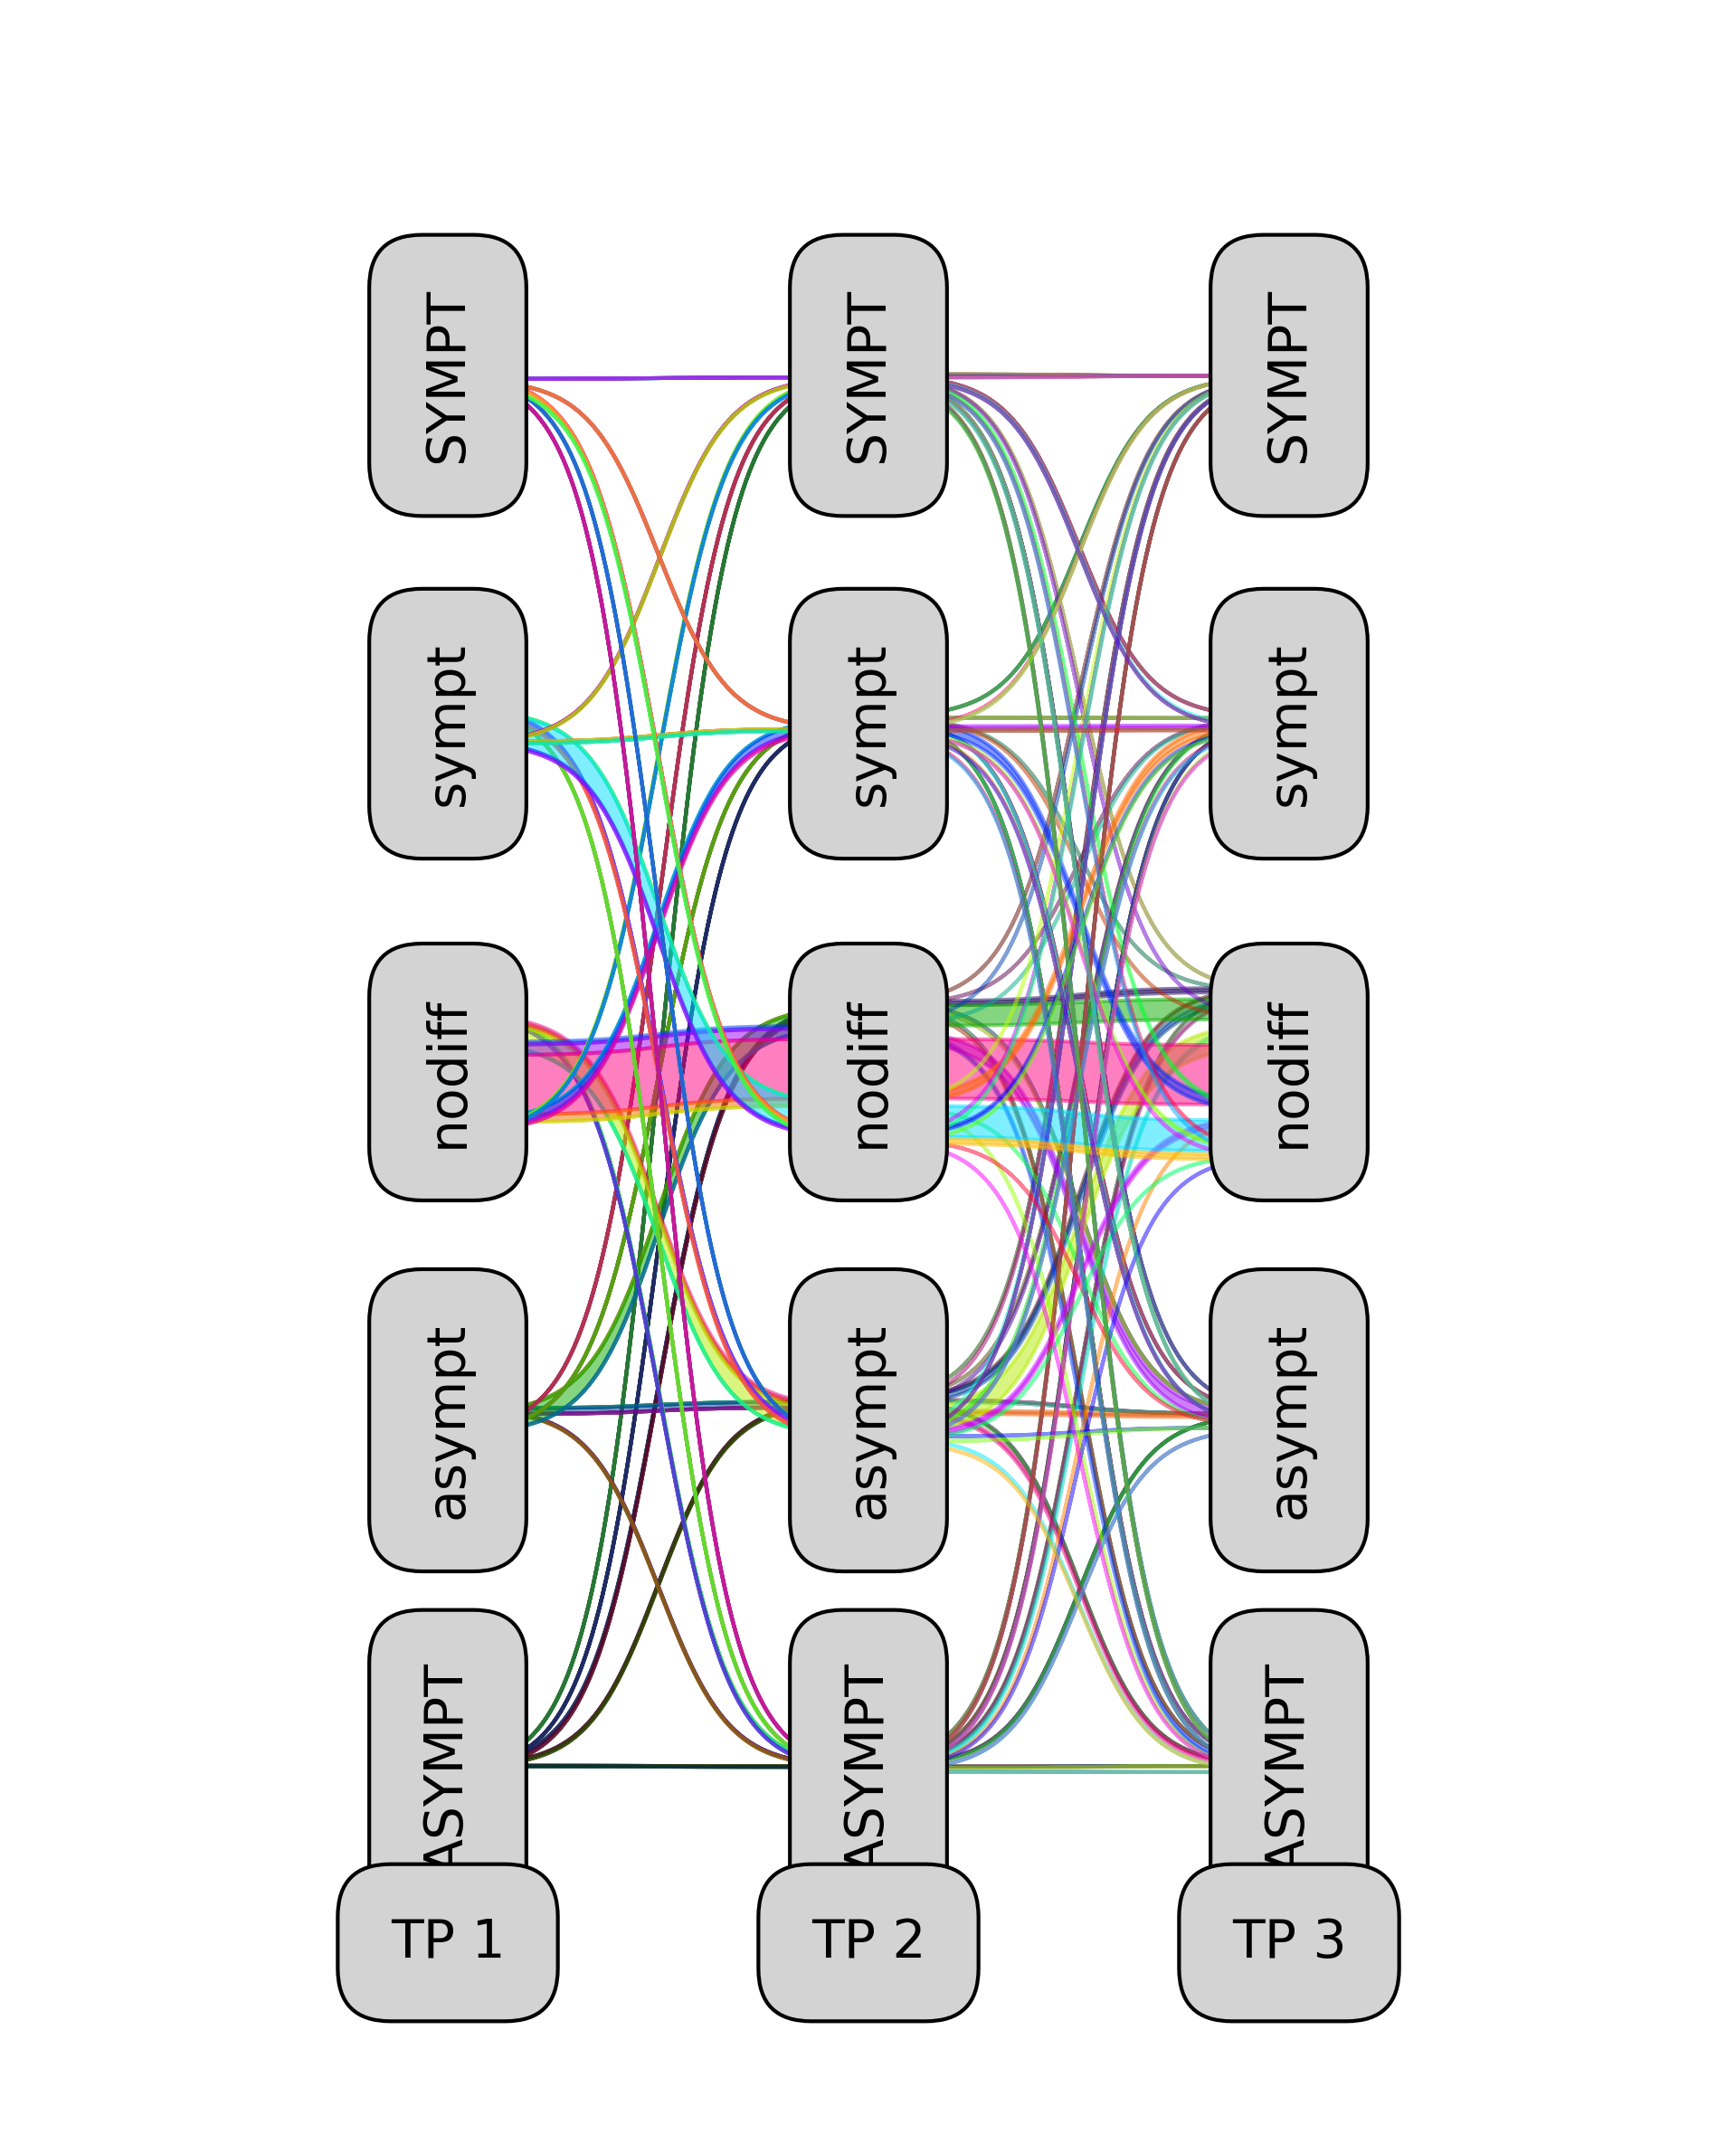

In [9]:
fa.plot_flows(figsize=(8,10), outfile="plots/ddiff_flows")

In [10]:
relFlowsAsympt = fa.flow_finder(["<", "<="], maxLevels=["asympt", None, None], verbose=True)
print(relFlowsAsympt)

6 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'asympt')]
7 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'nodiff')]
8 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'sympt')]
9 [('tp01', 'ASYMPT'), ('tp02', 'asympt'), ('tp03', 'SYMPT')]
12 [('tp01', 'ASYMPT'), ('tp02', 'nodiff'), ('tp03', 'nodiff')]
13 [('tp01', 'ASYMPT'), ('tp02', 'nodiff'), ('tp03', 'sympt')]
14 [('tp01', 'ASYMPT'), ('tp02', 'nodiff'), ('tp03', 'SYMPT')]
18 [('tp01', 'ASYMPT'), ('tp02', 'sympt'), ('tp03', 'sympt')]
19 [('tp01', 'ASYMPT'), ('tp02', 'sympt'), ('tp03', 'SYMPT')]
24 [('tp01', 'ASYMPT'), ('tp02', 'SYMPT'), ('tp03', 'SYMPT')]
37 [('tp01', 'asympt'), ('tp02', 'nodiff'), ('tp03', 'nodiff')]
38 [('tp01', 'asympt'), ('tp02', 'nodiff'), ('tp03', 'sympt')]
39 [('tp01', 'asympt'), ('tp02', 'nodiff'), ('tp03', 'SYMPT')]
43 [('tp01', 'asympt'), ('tp02', 'sympt'), ('tp03', 'sympt')]
44 [('tp01', 'asympt'), ('tp02', 'sympt'), ('tp03', 'SYMPT')]
49 [('tp01', 'asympt'), ('tp02', 'SYMPT'), ('tp03', 'SYMPT')

In [11]:
relFlowsSympt = fa.flow_finder([">", ">="], minLevels=["sympt", None, None], verbose=True)
print(relFlowsSympt)

75 [('tp01', 'sympt'), ('tp02', 'ASYMPT'), ('tp03', 'ASYMPT')]
80 [('tp01', 'sympt'), ('tp02', 'asympt'), ('tp03', 'ASYMPT')]
81 [('tp01', 'sympt'), ('tp02', 'asympt'), ('tp03', 'asympt')]
85 [('tp01', 'sympt'), ('tp02', 'nodiff'), ('tp03', 'ASYMPT')]
86 [('tp01', 'sympt'), ('tp02', 'nodiff'), ('tp03', 'asympt')]
87 [('tp01', 'sympt'), ('tp02', 'nodiff'), ('tp03', 'nodiff')]
100 [('tp01', 'SYMPT'), ('tp02', 'ASYMPT'), ('tp03', 'ASYMPT')]
105 [('tp01', 'SYMPT'), ('tp02', 'asympt'), ('tp03', 'ASYMPT')]
106 [('tp01', 'SYMPT'), ('tp02', 'asympt'), ('tp03', 'asympt')]
110 [('tp01', 'SYMPT'), ('tp02', 'nodiff'), ('tp03', 'ASYMPT')]
111 [('tp01', 'SYMPT'), ('tp02', 'nodiff'), ('tp03', 'asympt')]
112 [('tp01', 'SYMPT'), ('tp02', 'nodiff'), ('tp03', 'nodiff')]
115 [('tp01', 'SYMPT'), ('tp02', 'sympt'), ('tp03', 'ASYMPT')]
116 [('tp01', 'SYMPT'), ('tp02', 'sympt'), ('tp03', 'asympt')]
117 [('tp01', 'SYMPT'), ('tp02', 'sympt'), ('tp03', 'nodiff')]
118 [('tp01', 'SYMPT'), ('tp02', 'sympt'), ('tp03

Figure Size (8, 10)


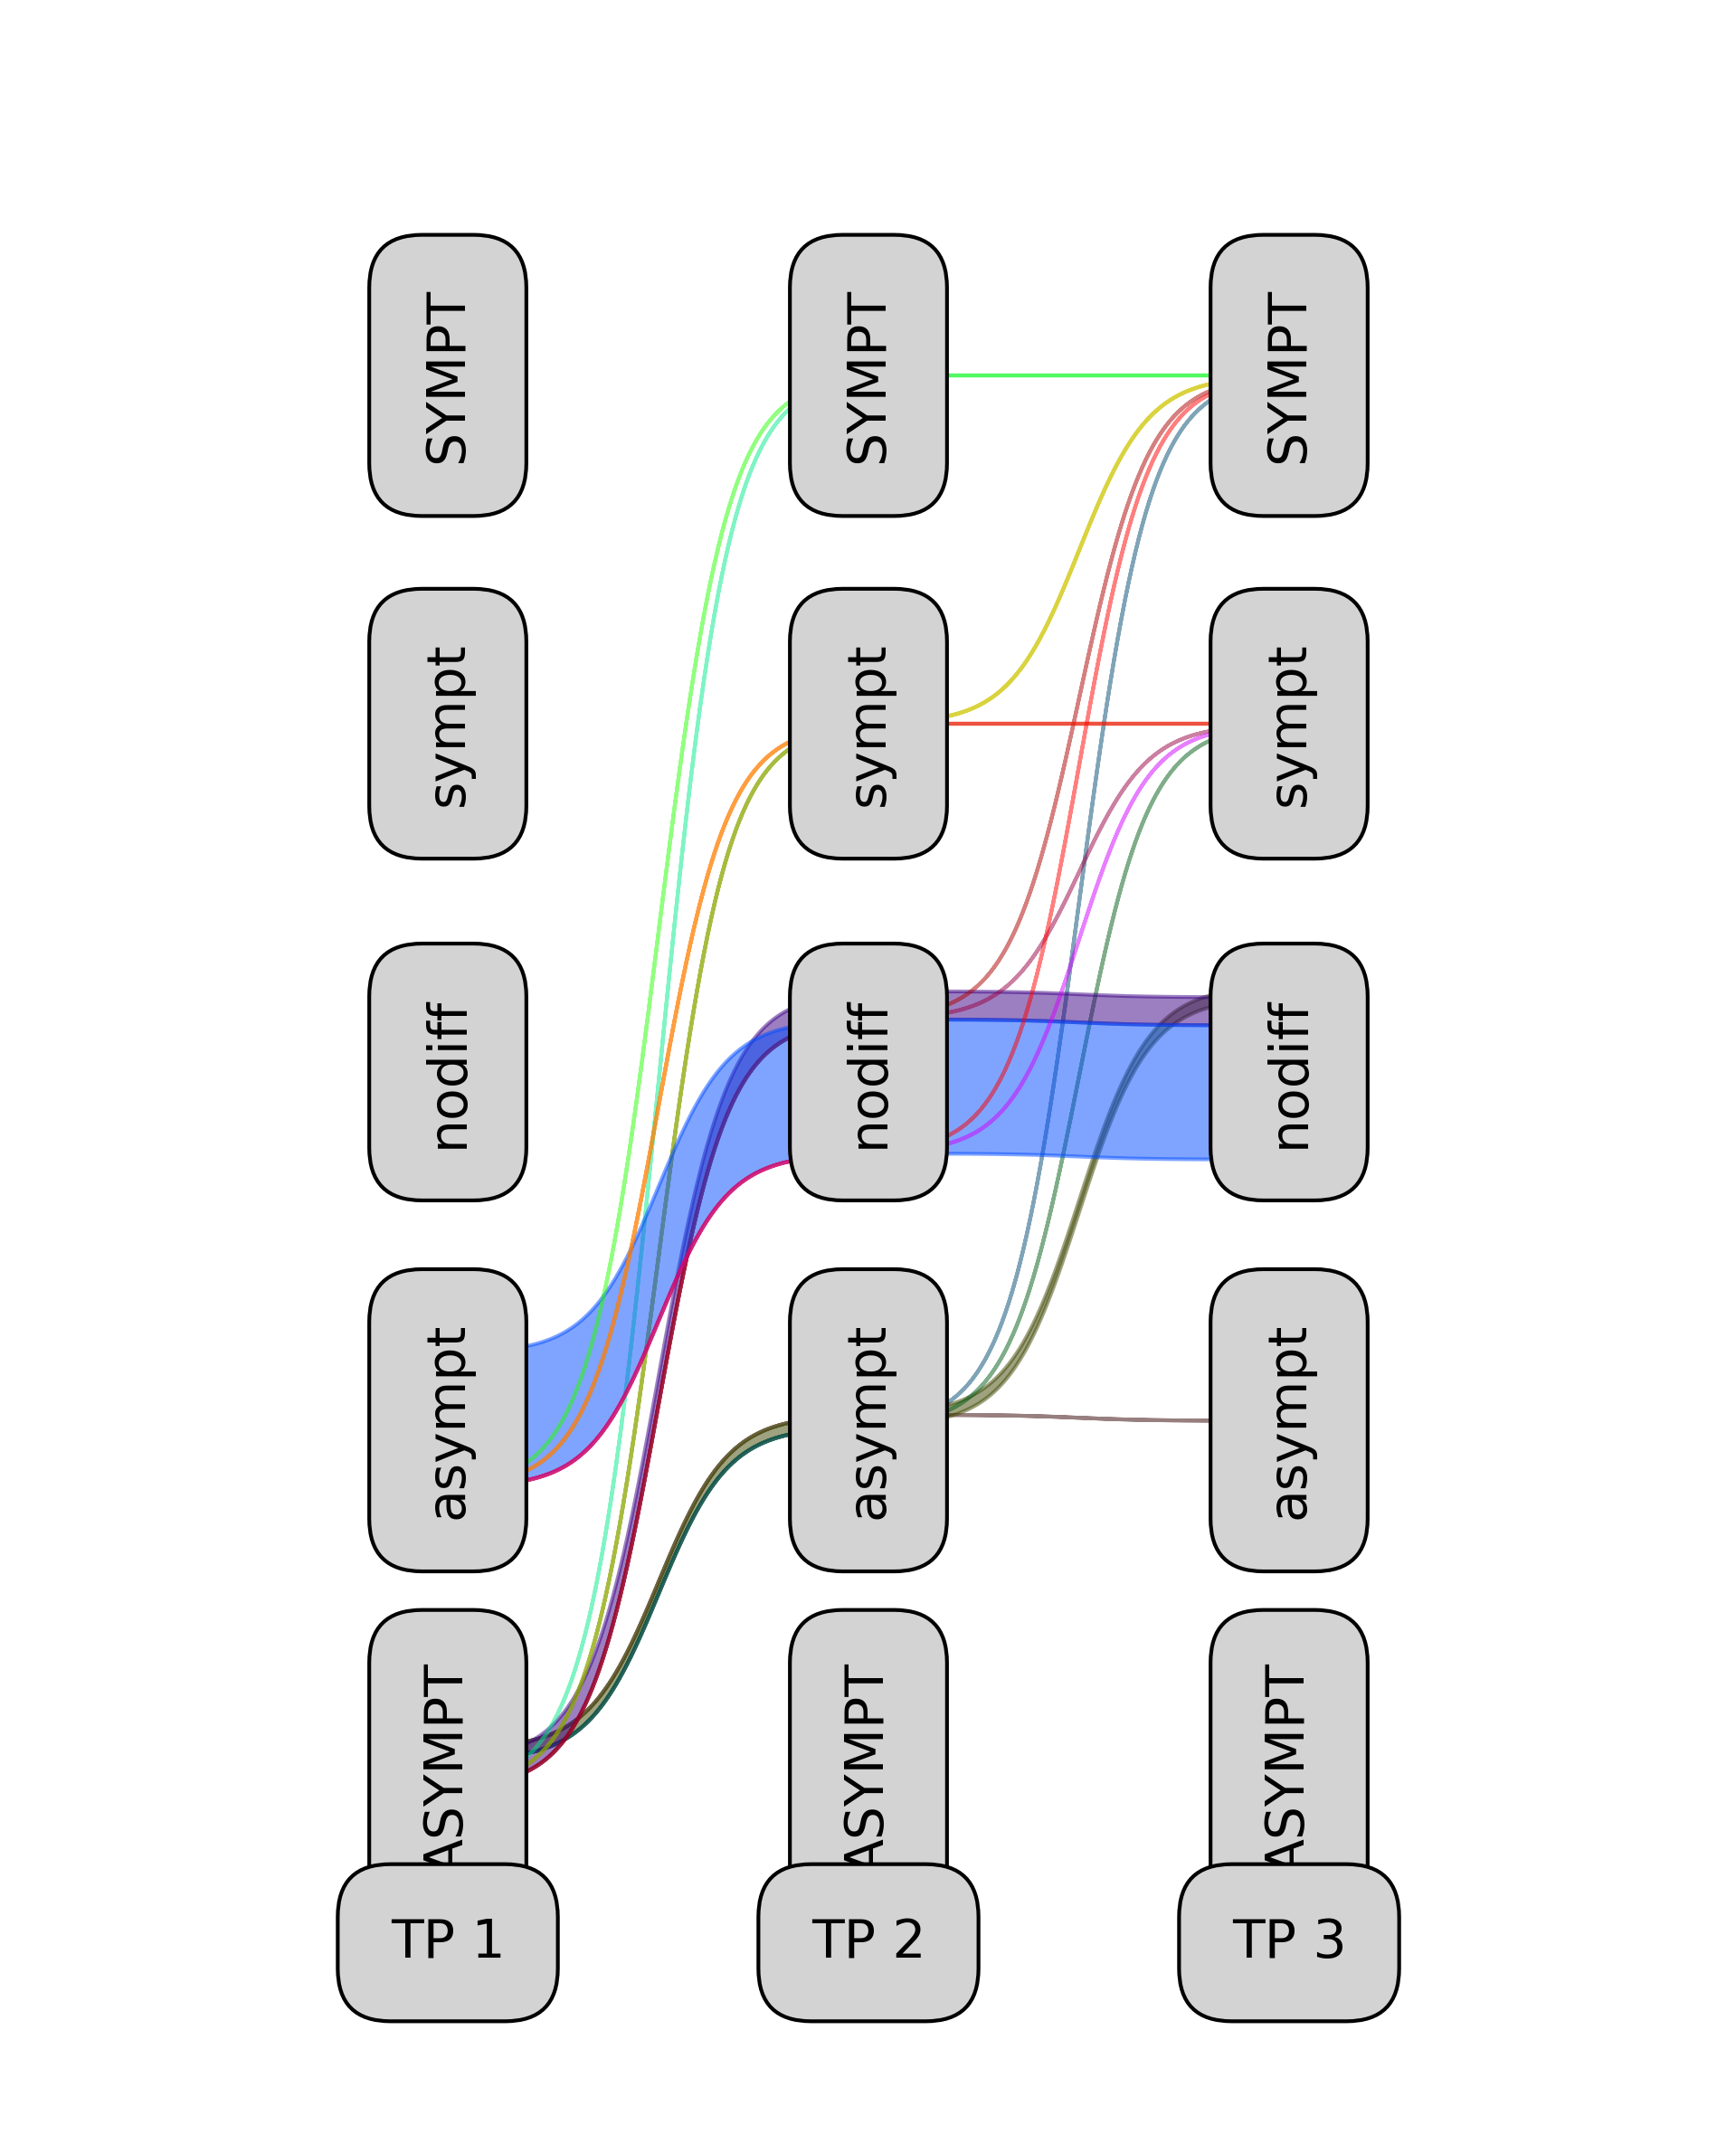

In [12]:
fa.plot_flows(use_flows=relFlowsAsympt, figsize=(8,10), outfile="plots/ddiff_flows_asympt")

Figure Size (8, 10)


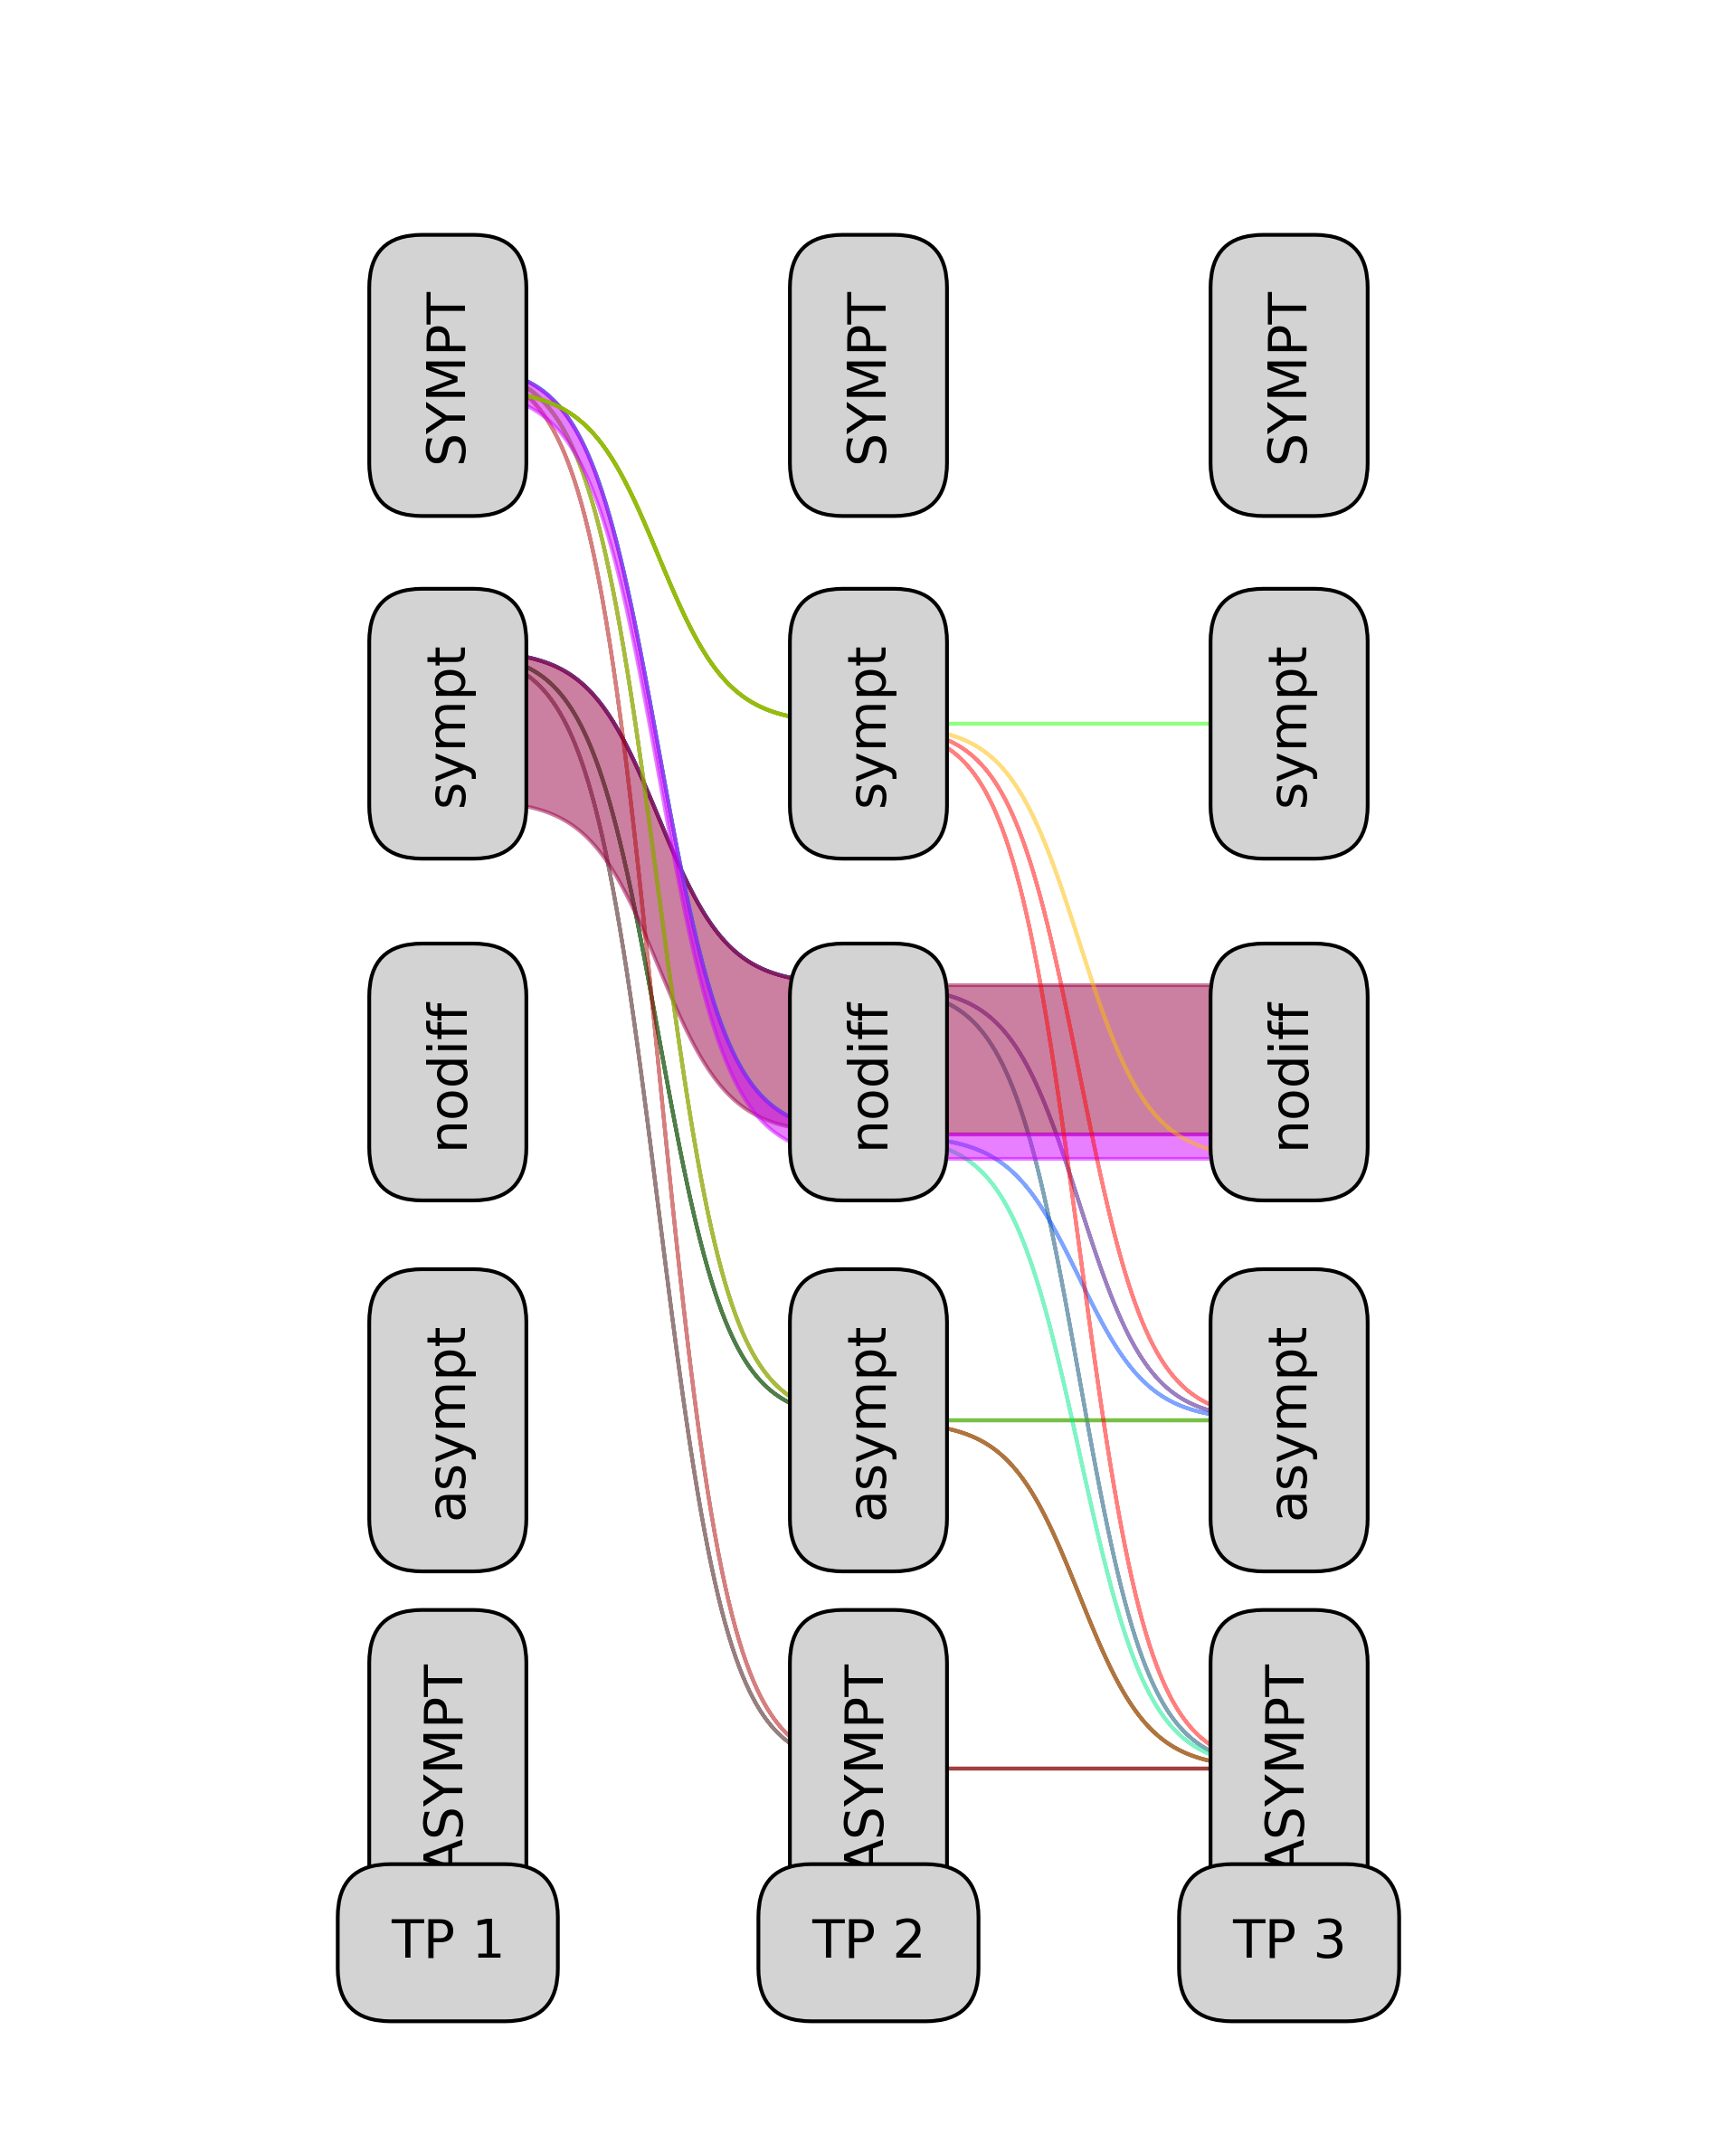

In [13]:
fa.plot_flows(use_flows=relFlowsSympt, figsize=(8,10), outfile="plots/ddiff_flows_sympt")

In [14]:
pwScoresRelAsmypt = fa.analyse_pathways(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsAsympt)
pwScoresRelSmypt = fa.analyse_pathways(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsSympt)

Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Starting Event Loop
Event Loop Completed
Calculating p-values for groups [1, 5, 10, 50, 100, 2570]
Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Starting Event Loop
Event Loop Completed
Calculating p-values for groups [1, 5, 10, 50, 100, 2570]


In [15]:
pwScoresAsymptGrp = fa.analyse_pathways_grouped(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsAsympt)
pwScoresSymptGrp = fa.analyse_pathways_grouped(additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsSympt)

Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Calculating p-values for groups [2, 10, 50, 100, 2570]
Loading pathways from ReactomePathways.gmt
Identified 2584 pathways
Calculating p-values for groups [2, 10, 50, 100, 2570]


pwid                                             pwname  \
2415   R-HSA-202430   Translocation of ZAP-70 to Immunological synapse   
1636   R-HSA-202427         Phosphorylation of CD3 and TCR zeta chains   
1554   R-HSA-389948                                     PD-1 signaling   
2584      ISG_SHORT                                          ISG_SHORT   
2585       ISG_LONG                                           ISG_LONG   
982    R-HSA-202433           Generation of second messenger molecules   
820   R-HSA-9634638  Estrogen-dependent nuclear events downstream o...   
387    R-HSA-388841                   Costimulation by the CD28 family   
1510   R-HSA-198725  Nuclear Events (kinase and transcription facto...   
902     R-HSA-72689           Formation of a pool of free 40S subunits   
1154   R-HSA-877300                         Interferon gamma signaling   
1424  R-HSA-9031628                       NGF-stimulated transcription   
2537    R-HSA-72200                    mRNA Editing: C to U Conversion   
907     R-HSA-75094                         Formation of the Editosome   
748    R-HSA-202424                           Downstream TCR signaling   
1216   R-HSA-156827  L13a-mediated translational silencing of Cerul...   
98     R-HSA-450341  Activation of the AP-1 family of transcription...   
965     R-HSA-72706  GTP hydrolysis and joining of the 60S ribosoma...   
1289  R-HSA-2132295                  MHC class II antigen presentation   
2484   R-HSA-192823                             Viral mRNA Translation   

        pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
2415  2.430285       26  18.182908  228.000003                     5   
1636  2.430285       29  18.182908  228.000003                     5   
1554  2.430285       30  18.182908  228.000003                     5   
2584  1.216680       17  18.182908  228.000003                     3   
2585  1.928630       55  18.182908  228.000003                     7   
982   2.430285       41  18.182908  228.000003                     5   
820   1.274579       24  18.182908  228.000003                     4   
387   2.430285       78  18.182908  228.000003                     6   
1510  1.847614       62  18.182908  228.000003                     6   
902   2.657097      106  18.182908  228.000003                     7   
1154  2.731783       95  18.182908  228.000003                     9   
1424  1.847614       40  18.182908  228.000003                     6   
2537  0.625787        8  18.182908  228.000003                     1   
907   0.625787        8  18.182908  228.000003                     1   
748   2.430285      104  18.182908  228.000003                     7   
1216  2.657097      116  18.182908  228.000003                     7   
98    0.752000       10  18.182908  228.000003                     1   
965   2.657097      117  18.182908  228.000003                     7   
1289  2.430285      108  18.182908  228.000003                     7   
2484  2.290831      102  18.182908  228.000003                     6   

      pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
2415     0.093472        0.133658       0.012493            7.389086   
1636     0.083803        0.133658       0.011201            6.585823   
1554     0.081009        0.133658       0.010828            6.353769   
2584     0.071569        0.066913       0.004789            5.569568   
2585     0.035066        0.106068       0.003719            4.562136   
982      0.059275        0.133658       0.007923            4.548277   
820      0.053107        0.070098       0.003723            4.035913   
387      0.031157        0.133658       0.004164            3.989937   
1510     0.029800        0.101613       0.003028            3.791235   
902      0.025067        0.146132       0.003663            3.693951   
1154     0.028756        0.150239       0.004320            3.638304   
1424     0.046190        0.101613       0.004694            3.461300   
2537     0.

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(10, 14)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:1699: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


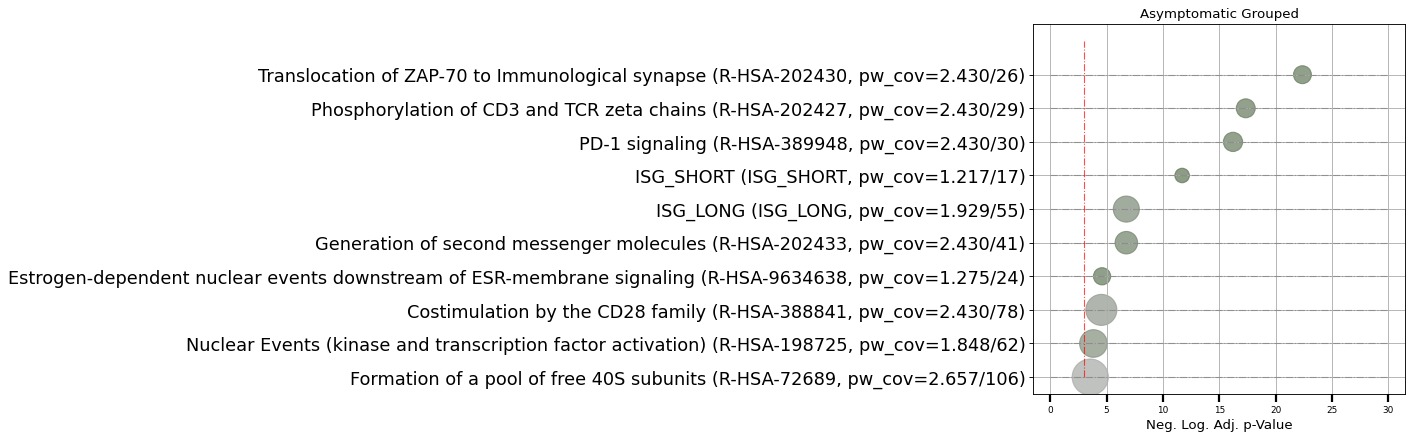

In [16]:
selPWsAsymptGrp = pwScoresAsymptGrp[(pwScoresAsymptGrp["adj_pval"] < 0.2)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsAsymptGrp)
fa.plotORAresult(selPWsAsymptGrp, "Asymptomatic Grouped", numResults=10, figsize=(6,6), outfile="plots/ddiff_asympt_ra")

pwid                                             pwname  \
2371  R-HSA-1679131        Trafficking and processing of endosomal TLR   
2390  R-HSA-2173793  Transcriptional activity of SMAD2/SMAD3:SMAD4 ...   
2159  R-HSA-9006936                   Signaling by TGFB family members   
168   R-HSA-2022090  Assembly of collagen fibrils and other multime...   
697   R-HSA-2022923                      Dermatan sulfate biosynthesis   
689   R-HSA-1474228            Degradation of the extracellular matrix   
746   R-HSA-2173795  Downregulation of SMAD2/3:SMAD4 transcriptiona...   
1177  R-HSA-6785807         Interleukin-4 and Interleukin-13 signaling   
1443  R-HSA-9024446                 NR1H2 and NR1H3-mediated signaling   
2384  R-HSA-8986944                Transcriptional Regulation by MECP2   
177   R-HSA-9678110                       Attachment and Entry_9678110   
736   R-HSA-9697154            Disorders of Nervous System Development   
735   R-HSA-9675151                 Disorders of Developmental Biology   
1255  R-HSA-9005891         Loss of function of MECP2 in Rett syndrome   
1616  R-HSA-9005895                  Pervasive developmental disorders   
1179  R-HSA-1059683                            Interleukin-6 signaling   
800   R-HSA-1236977                         Endosomal/Vacuolar pathway   

        pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
2371  1.269038       13  40.019334  228.000003                     2   
2390  2.036551       51  40.019334  228.000003                     5   
2159  2.458163      121  40.019334  228.000003                     6   
168   1.724644       57  40.019334  228.000003                     3   
697   0.714000       11  40.019334  228.000003                     1   
689   1.977288      111  40.019334  228.000003                     4   
746   2.036551       31  40.019334  228.000003                     4   
1177  2.037556      112  40.019334  228.000003                    12   
1443  1.416515       54  40.019334  228.000003                     3   
2384  1.628167       63  40.019334  228.000003                     6   
177   0.654222       11  40.019334  228.000003                     1   
736   0.738163       13  40.019334  228.000003                     2   
735   0.738163       13  40.019334  228.000003                     2   
1255  0.738163       13  40.019334  228.000003                     2   
1616  0.738163       13  40.019334  228.000003                     2   
1179  0.599417       11  40.019334  228.000003                     1   
800   0.654222       12  40.019334  228.000003                     1   

      pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
2371     0.097618        0.031711       0.003096            6.020534   
2390     0.039932        0.050889       0.002032            5.830164   
2159     0.020315        0.061424       0.001248            4.429407   
168      0.030257        0.043095       0.001304            4.223089   
697      0.064909        0.017841       0.001158            3.754767   
689      0.017813        0.049408       0.000880            3.747124   
746      0.065695        0.050889       0.003343            3.809220   
1177     0.018192        0.050914       0.000926            3.850491   
1443     0.026232        0.035396       0.000928            3.554519   
2384     0.025844        0.040685       0.001051            3.490098   
177      0.059475        0.016348       0.000972            3.378328   
736      0.056782        0.018445       0.001047            3.191788   
735      0.056782        0.018445       0.001047            3.191788   
1255     0.056782        0.018445       0.001047            3.191788   
1616     0.056782        0.018445       0.001047            3.191788   
1179     0.054492        0.014978       0.000816            3.033204   
800      0.054518        0.016348       0.000891            3.035011   

              pval  adj_pval  
2371  8.692108e-10  0.000002  
2390  2.768652e-09  0.0000

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(10, 14)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:1699: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


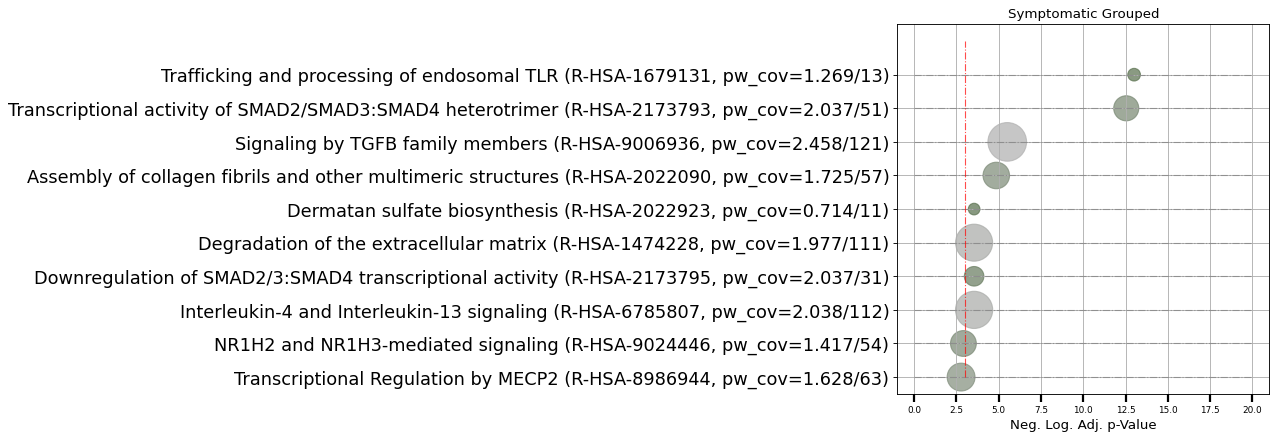

In [17]:
selPWsSymptGrp = pwScoresSymptGrp[(pwScoresSymptGrp["adj_pval"] < 0.2)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsSymptGrp)
fa.plotORAresult(selPWsSymptGrp, "Symptomatic Grouped", numResults=10, figsize=(6, 6), outfile="plots/ddiff_sympt_ra")

In [18]:
pwScoresAsymptGrpGO = fa.analyse_pathways_grouped(pathways_file="go_human.bp.gmt", additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsAsympt)
pwScoresSymptGrpGO = fa.analyse_pathways_grouped(pathways_file="go_human.bp.gmt", additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsSympt)

Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [2, 10, 50, 100, 1226]
Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [2, 10, 50, 100, 1226]


pwid                                             pwname  \
5518   GO:0002503  peptide antigen assembly with MHC class II pro...   
12314  GO:0002381  immunoglobulin production involved in immunogl...   
5516   GO:0002469  myeloid dendritic cell antigen processing and ...   
5523   GO:2000516  positive regulation of CD4-positive, alpha-bet...   
5522   GO:0045622        regulation of T-helper cell differentiation   
5243   GO:0001661                         conditioned taste aversion   
4774   GO:1903131                   mononuclear cell differentiation   
12536    ISG_LONG                                           ISG_LONG   
3401   GO:0140467               integrated stress response signaling   
8652   GO:0140194  negative regulation of adenylate cyclase-inhib...   
5520   GO:0032831  positive regulation of CD4-positive, CD25-posi...   
3830   GO:0019886  antigen processing and presentation of exogeno...   
7641   GO:0051447          negative regulation of meiotic cell cycle   
365    GO:0050870           positive regulation of T cell activation   
12535   ISG_SHORT                                          ISG_SHORT   
5245   GO:0030431                                              sleep   
8874   GO:1901991  negative regulation of mitotic cell cycle phas...   
8291   GO:0044355             clearance of foreign intracellular DNA   
4445   GO:0061052  negative regulation of cell growth involved in...   
3080   GO:0007500                 mesodermal cell fate determination   

         pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
5518   2.430285       16  22.128131  292.000003                     5   
12314  2.430285       17  22.128131  292.000003                     5   
5516   1.067561        3  22.128131  292.000003                     2   
5523   1.067561        4  22.128131  292.000003                     3   
5522   1.067561        4  22.128131  292.000003                     2   
5243   0.752000        3  22.128131  292.000003                     1   
4774   0.752000        3  22.128131  292.000003                     1   
12536  1.928630       55  22.128131  292.000003                     7   
3401   2.010772       24  22.128131  292.000003                     5   
8652   0.732000        1  22.128131  292.000003                     1   
5520   1.067561        5  22.128131  292.000003                     2   
3830   2.430285       31  22.128131  292.000003                     6   
7641   0.632961        3  22.128131  292.000003                     1   
365    2.430285       33  22.128131  292.000003                     5   
12535  1.216680       17  22.128131  292.000003                     3   
5245   0.752000       11  22.128131  292.000003                     1   
8874   0.738166        4  22.128131  292.000003                     2   
8291   0.625787        1  22.128131  292.000003                     1   
4445   0.732000       11  22.128131  292.000003                     1   
3080   0.534300        3  22.128131  292.000003                     1   

       pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
5518      0.151893        0.109828       0.016682           10.542598   
12314     0.142958        0.109828       0.015701            9.899078   
5516      0.355854        0.048244       0.017168            8.975350   
5523      0.266890        0.048244       0.012876            6.649853   
5522      0.266890        0.048244       0.012876            6.649853   
5243      0.250667        0.033984       0.008519            6.225772   
4774      0.250667        0.033984       0.008519            6.225772   
12536     0.035066        0.087157       0.003056            6.059911   
3401      0.083782        0.090869       0.007613            5.637037   
8652      0.732000        0.033080       0.024215            5.236259   
5520      0.213512        0.048244       0.010301            5.254555   
3830      0.078396        0.109828       0.008610            5.249128   
7641      0.21098

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:1699: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


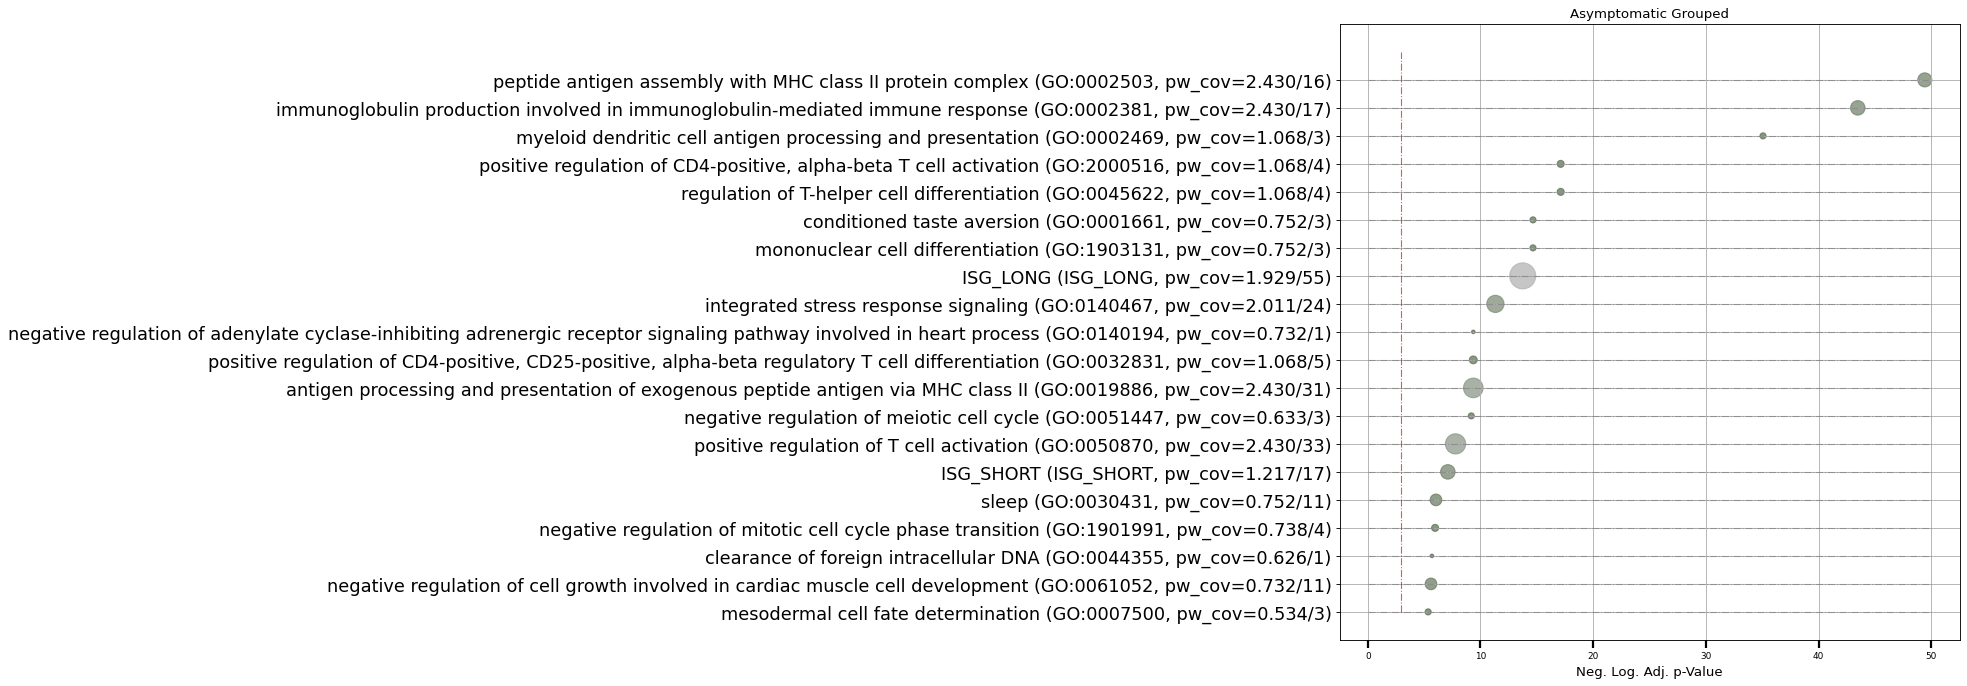

In [19]:
selPWsAsymptGrpGO = pwScoresAsymptGrpGO[(pwScoresAsymptGrpGO["adj_pval"] < 0.2)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsAsymptGrpGO)
fa.plotORAresult(selPWsAsymptGrpGO, "Asymptomatic Grouped", numResults=20, figsize=(10,10), outfile="plots/ddiff_asympt_go")

pwid                                             pwname    pwFlow  \
7558  GO:1902339  positive regulation of apoptotic process invol...  1.403470   
4332  GO:0010614  negative regulation of cardiac muscle hypertrophy  1.403470   
7557  GO:0003332  negative regulation of extracellular matrix co...  1.403470   
1130  GO:0046718                         viral entry into host cell  2.873173   
6042  GO:0150077           regulation of neuroinflammatory response  0.940523   
6288  GO:0097067      cellular response to thyroid hormone stimulus  1.269038   
472   GO:0032760  positive regulation of tumor necrosis factor p...  2.340994   
2495  GO:1905907    negative regulation of amyloid fibril formation  0.965596   
868   GO:1901224     positive regulation of NIK/NF-kappaB signaling  2.141188   
4299  GO:0002281  macrophage activation involved in immune response  1.000402   
2371  GO:0030514       negative regulation of BMP signaling pathway  1.683696   
2667  GO:0071498            cellular response to fluid shear stress  0.936828   
2995  GO:0002726  positive regulation of T cell cytokine production  0.781775   
7556  GO:0003177                        pulmonary valve development  0.993774   
5291  GO:0002859  negative regulation of natural killer cell med...  0.728331   
2067  GO:0033209   tumor necrosis factor-mediated signaling pathway  1.636046   
7480  GO:2001189  negative regulation of T cell activation via T...  0.728331   
846   GO:0002519            natural killer cell tolerance induction  0.728331   
7829  GO:0030886  negative regulation of myeloid dendritic cell ...  0.728331   
176   GO:0071222            cellular response to lipopolysaccharide  3.418602   

      pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  pw_coverage  \
7558        3  48.632385  292.000003                     3     0.467823   
4332       13  48.632385  292.000003                     5     0.107959   
7557        4  48.632385  292.000003                     3     0.350868   
1130      101  48.632385  292.000003                     7     0.028447   
6042       11  48.632385  292.000003                     3     0.085502   
6288       16  48.632385  292.000003                     2     0.079315   
472       101  48.632385  292.000003                     6     0.023178   
2495       13  48.632385  292.000003                     2     0.074277   
868        66  48.632385  292.000003                     7     0.032442   
4299       14  48.632385  292.000003                     2     0.071457   
2371       54  48.632385  292.000003                     4     0.031180   
2667       13  48.632385  292.000003                     4     0.072064   
2995       11  48.632385  292.000003                     2     0.071070   
7556        4  48.632385  292.000003                     2     0.248444   
5291        3  48.632385  292.000003                     1     0.242777   
2067       55  48.632385  292.000003                     3     0.029746   
7480        3  48.632385  292.000003                     1     0.242777   
846         3  48.632385  292.000003                     1     0.242777   
7829        3  48.632385  292.000003                     1     0.242777   
176       163  48.632385  292.000003                    13     0.020973   

      genes_coverage  mean_coverage  pw_coverage_zscore          pval  \
7558        0.028859       0.013501            7.134207  4.867323e-13   
4332        0.028859       0.003116            5.797814  3.359246e-09   
7557        0.028859       0.010126            5.128488  1.460391e-07   
1130        0.059079       0.001681            4.828559  6.876231e-07   
6042        0.019339       0.001654            4.398067  5.460958e-06   
6288        0.026095       0.002070            4.012422  3.004944e-05   
472         0.048137       0.001116            3.724956  9.767478e-05   
2495        0.019855       0.001475            3.698390  1.084856e-04   
868         0.044028       0.001428            3.676726  1.181235e-04   
4299

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:1699: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


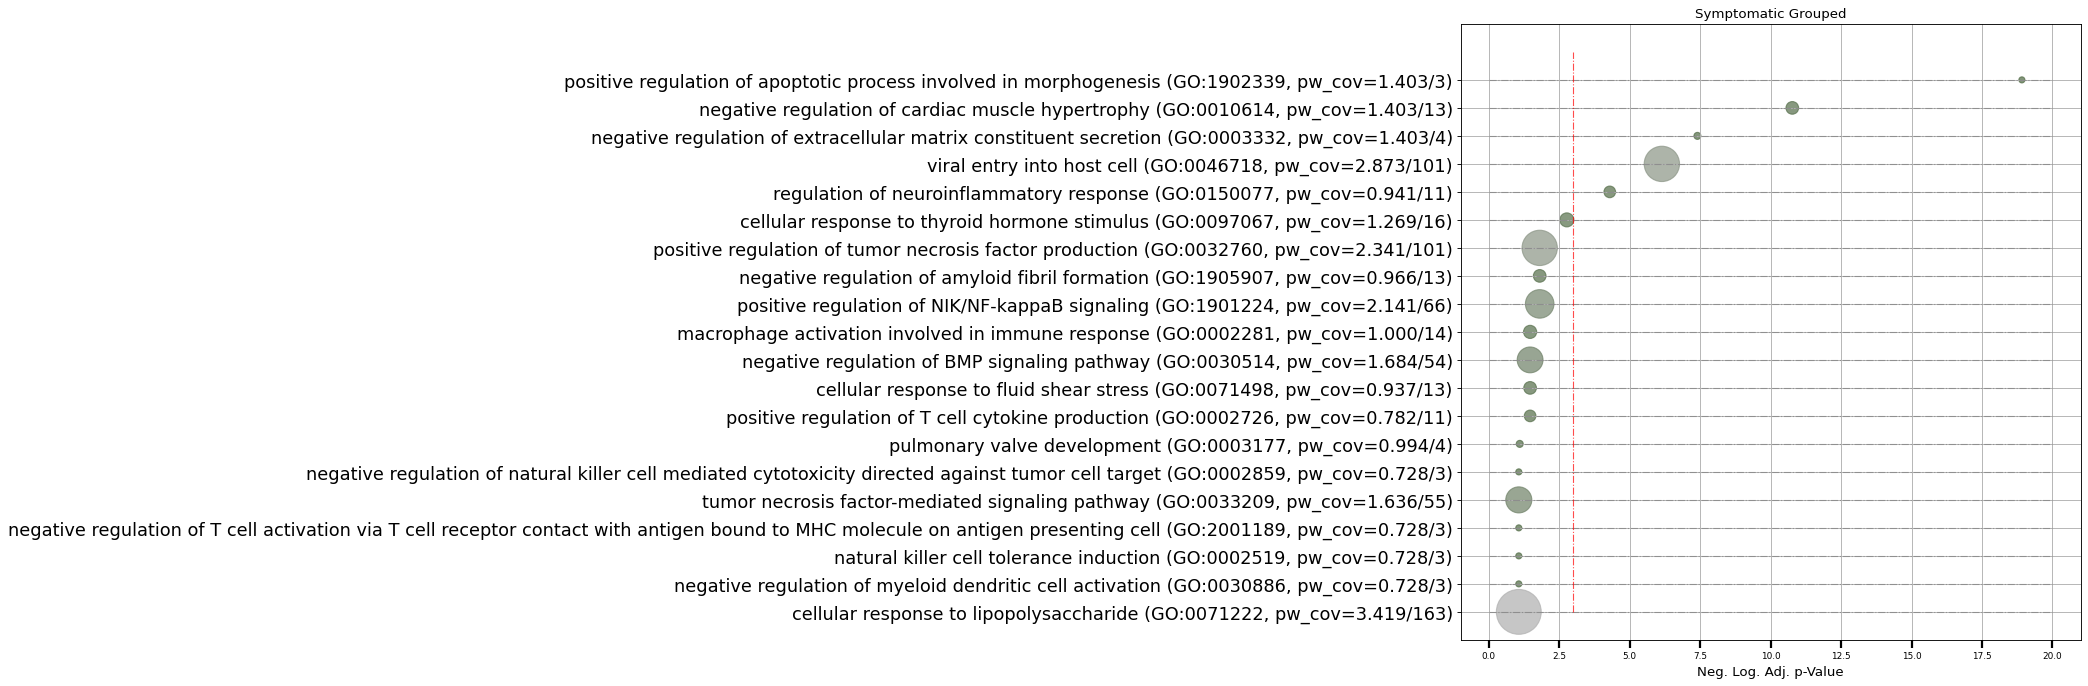

In [20]:
selPWsSymptGrpGO = pwScoresSymptGrpGO[(pwScoresSymptGrpGO["adj_pval"] < 1)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsSymptGrpGO)
fa.plotORAresult(selPWsSymptGrpGO, "Symptomatic Grouped", numResults=20, figsize=(10,10), outfile="plots/ddiff_sympt_go")

In [21]:
pwScoresAsymptGrpMSIG = fa.analyse_pathways_grouped(pathways_file="go_human.bp.gmt", additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsAsympt)
pwScoresSymptGrpMSIG = fa.analyse_pathways_grouped(pathways_file="go_human.bp.gmt", additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlowsSympt)

Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [2, 10, 50, 100, 1226]
Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [2, 10, 50, 100, 1226]


pwid                                             pwname  \
5518   GO:0002503  peptide antigen assembly with MHC class II pro...   
12314  GO:0002381  immunoglobulin production involved in immunogl...   
5516   GO:0002469  myeloid dendritic cell antigen processing and ...   
5523   GO:2000516  positive regulation of CD4-positive, alpha-bet...   
5522   GO:0045622        regulation of T-helper cell differentiation   
5243   GO:0001661                         conditioned taste aversion   
4774   GO:1903131                   mononuclear cell differentiation   
12536    ISG_LONG                                           ISG_LONG   
3401   GO:0140467               integrated stress response signaling   
8652   GO:0140194  negative regulation of adenylate cyclase-inhib...   
5520   GO:0032831  positive regulation of CD4-positive, CD25-posi...   
3830   GO:0019886  antigen processing and presentation of exogeno...   
7641   GO:0051447          negative regulation of meiotic cell cycle   
365    GO:0050870           positive regulation of T cell activation   
12535   ISG_SHORT                                          ISG_SHORT   
5245   GO:0030431                                              sleep   
8874   GO:1901991  negative regulation of mitotic cell cycle phas...   
8291   GO:0044355             clearance of foreign intracellular DNA   
4445   GO:0061052  negative regulation of cell growth involved in...   
3080   GO:0007500                 mesodermal cell fate determination   

         pwFlow  pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  \
5518   2.430285       16  22.128131  292.000003                     5   
12314  2.430285       17  22.128131  292.000003                     5   
5516   1.067561        3  22.128131  292.000003                     2   
5523   1.067561        4  22.128131  292.000003                     3   
5522   1.067561        4  22.128131  292.000003                     2   
5243   0.752000        3  22.128131  292.000003                     1   
4774   0.752000        3  22.128131  292.000003                     1   
12536  1.928630       55  22.128131  292.000003                     7   
3401   2.010772       24  22.128131  292.000003                     5   
8652   0.732000        1  22.128131  292.000003                     1   
5520   1.067561        5  22.128131  292.000003                     2   
3830   2.430285       31  22.128131  292.000003                     6   
7641   0.632961        3  22.128131  292.000003                     1   
365    2.430285       33  22.128131  292.000003                     5   
12535  1.216680       17  22.128131  292.000003                     3   
5245   0.752000       11  22.128131  292.000003                     1   
8874   0.738166        4  22.128131  292.000003                     2   
8291   0.625787        1  22.128131  292.000003                     1   
4445   0.732000       11  22.128131  292.000003                     1   
3080   0.534300        3  22.128131  292.000003                     1   

       pw_coverage  genes_coverage  mean_coverage  pw_coverage_zscore  \
5518      0.151893        0.109828       0.016682           10.542598   
12314     0.142958        0.109828       0.015701            9.899078   
5516      0.355854        0.048244       0.017168            8.975350   
5523      0.266890        0.048244       0.012876            6.649853   
5522      0.266890        0.048244       0.012876            6.649853   
5243      0.250667        0.033984       0.008519            6.225772   
4774      0.250667        0.033984       0.008519            6.225772   
12536     0.035066        0.087157       0.003056            6.059911   
3401      0.083782        0.090869       0.007613            5.637037   
8652      0.732000        0.033080       0.024215            5.236259   
5520      0.213512        0.048244       0.010301            5.254555   
3830      0.078396        0.109828       0.008610            5.249128   
7641      0.21098

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:1699: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


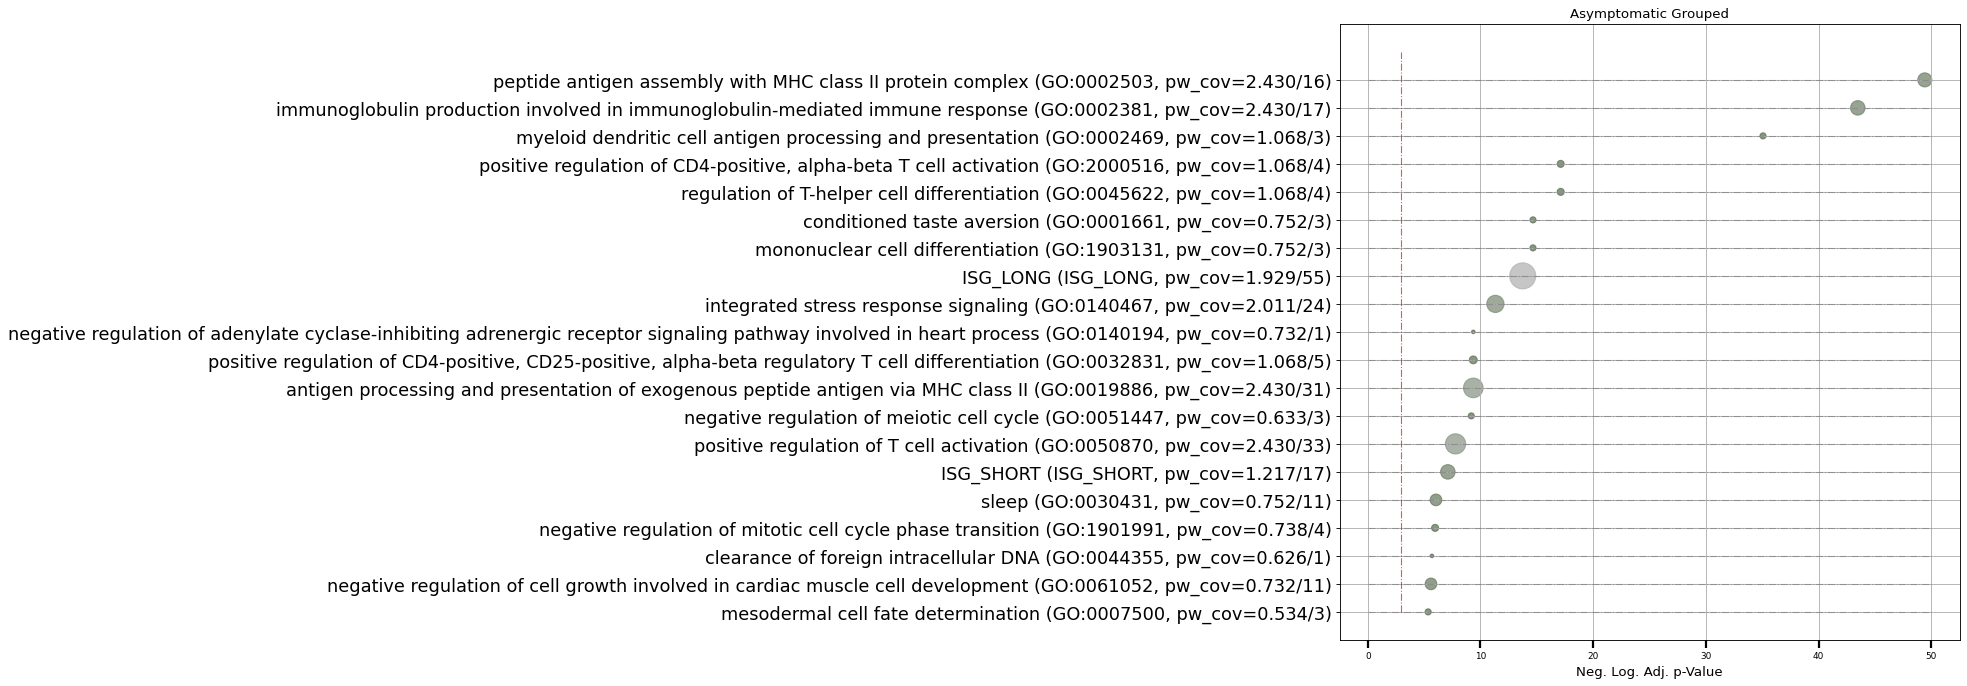

In [22]:
selPWsAsymptGrpMSIG = pwScoresAsymptGrpMSIG[(pwScoresAsymptGrpMSIG["adj_pval"] < 0.2)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsAsymptGrpMSIG)
fa.plotORAresult(selPWsAsymptGrpMSIG, "Asymptomatic Grouped", numResults=20, figsize=(10,10), outfile="plots/ddiff_asympt_msig")

pwid                                             pwname    pwFlow  \
7558  GO:1902339  positive regulation of apoptotic process invol...  1.403470   
4332  GO:0010614  negative regulation of cardiac muscle hypertrophy  1.403470   
7557  GO:0003332  negative regulation of extracellular matrix co...  1.403470   
1130  GO:0046718                         viral entry into host cell  2.873173   
6042  GO:0150077           regulation of neuroinflammatory response  0.940523   
6288  GO:0097067      cellular response to thyroid hormone stimulus  1.269038   
472   GO:0032760  positive regulation of tumor necrosis factor p...  2.340994   
2495  GO:1905907    negative regulation of amyloid fibril formation  0.965596   
868   GO:1901224     positive regulation of NIK/NF-kappaB signaling  2.141188   
4299  GO:0002281  macrophage activation involved in immune response  1.000402   
2371  GO:0030514       negative regulation of BMP signaling pathway  1.683696   
2667  GO:0071498            cellular response to fluid shear stress  0.936828   
2995  GO:0002726  positive regulation of T cell cytokine production  0.781775   
7556  GO:0003177                        pulmonary valve development  0.993774   
5291  GO:0002859  negative regulation of natural killer cell med...  0.728331   
2067  GO:0033209   tumor necrosis factor-mediated signaling pathway  1.636046   
7480  GO:2001189  negative regulation of T cell activation via T...  0.728331   
846   GO:0002519            natural killer cell tolerance induction  0.728331   
7829  GO:0030886  negative regulation of myeloid dendritic cell ...  0.728331   
176   GO:0071222            cellular response to lipopolysaccharide  3.418602   

      pwGenes  allPwFlow  allPwGenes  pw_gene_intersection  pw_coverage  \
7558        3  48.632385  292.000003                     3     0.467823   
4332       13  48.632385  292.000003                     5     0.107959   
7557        4  48.632385  292.000003                     3     0.350868   
1130      101  48.632385  292.000003                     7     0.028447   
6042       11  48.632385  292.000003                     3     0.085502   
6288       16  48.632385  292.000003                     2     0.079315   
472       101  48.632385  292.000003                     6     0.023178   
2495       13  48.632385  292.000003                     2     0.074277   
868        66  48.632385  292.000003                     7     0.032442   
4299       14  48.632385  292.000003                     2     0.071457   
2371       54  48.632385  292.000003                     4     0.031180   
2667       13  48.632385  292.000003                     4     0.072064   
2995       11  48.632385  292.000003                     2     0.071070   
7556        4  48.632385  292.000003                     2     0.248444   
5291        3  48.632385  292.000003                     1     0.242777   
2067       55  48.632385  292.000003                     3     0.029746   
7480        3  48.632385  292.000003                     1     0.242777   
846         3  48.632385  292.000003                     1     0.242777   
7829        3  48.632385  292.000003                     1     0.242777   
176       163  48.632385  292.000003                    13     0.020973   

      genes_coverage  mean_coverage  pw_coverage_zscore          pval  \
7558        0.028859       0.013501            7.134207  4.867323e-13   
4332        0.028859       0.003116            5.797814  3.359246e-09   
7557        0.028859       0.010126            5.128488  1.460391e-07   
1130        0.059079       0.001681            4.828559  6.876231e-07   
6042        0.019339       0.001654            4.398067  5.460958e-06   
6288        0.026095       0.002070            4.012422  3.004944e-05   
472         0.048137       0.001116            3.724956  9.767478e-05   
2495        0.019855       0.001475            3.698390  1.084856e-04   
868         0.044028       0.001428            3.676726  1.181235e-04   
4299

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


/usr/local/hdd2/data/plaque_ims/FlowSets/examples/../flowset.py:1699: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


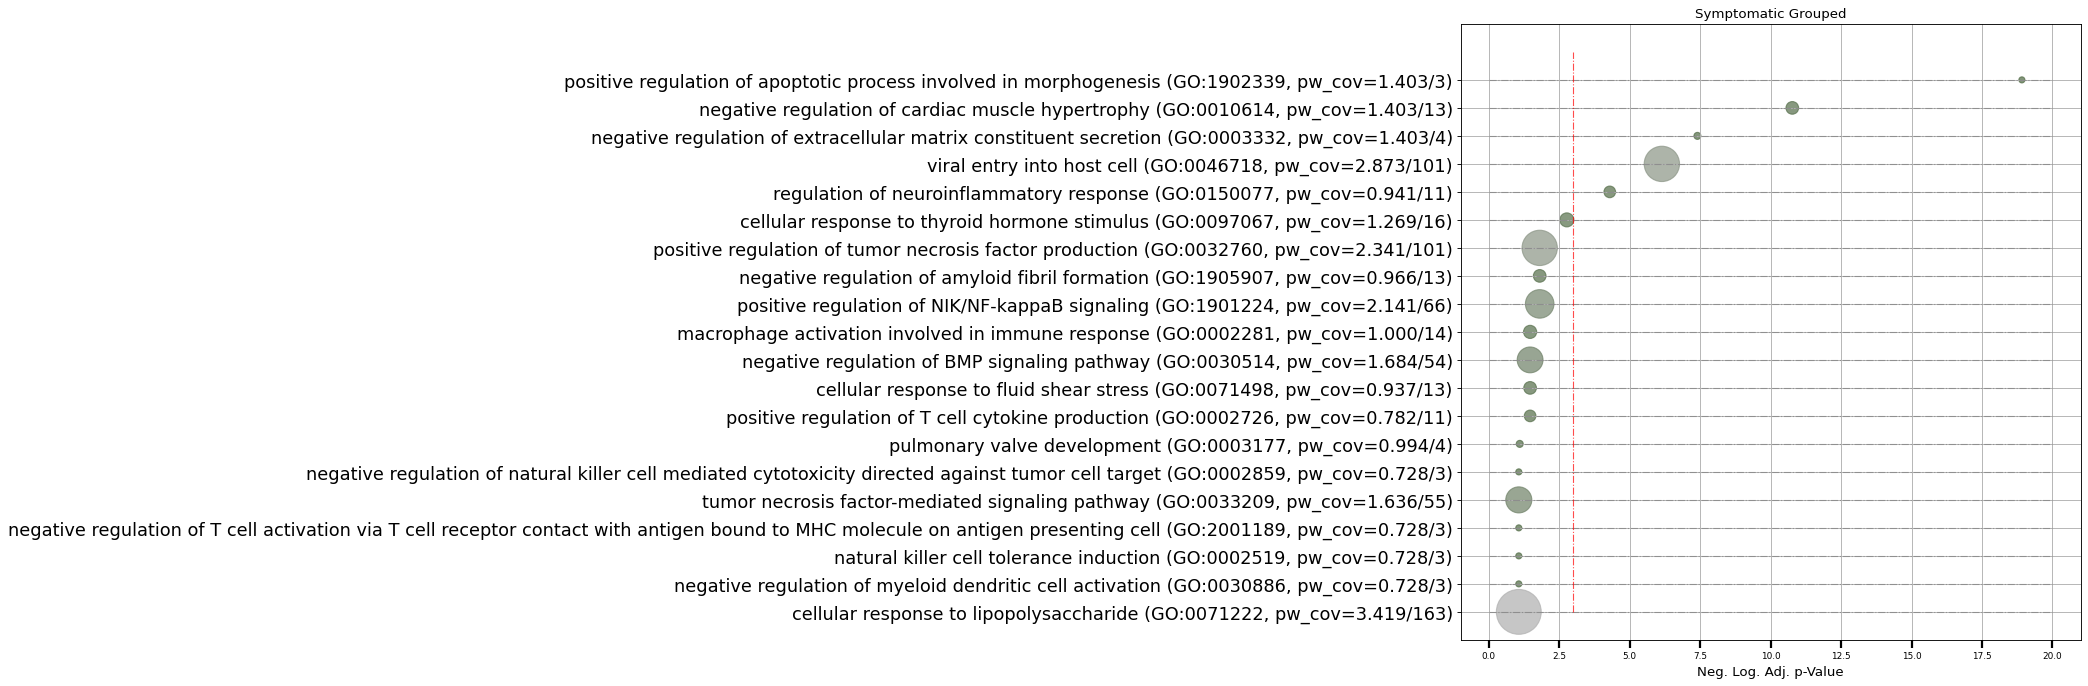

In [23]:
selPWsSymptGrpMSIG = pwScoresSymptGrpMSIG[(pwScoresSymptGrpMSIG["adj_pval"] < 1)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsSymptGrpMSIG)
fa.plotORAresult(selPWsSymptGrpMSIG, "Symptomatic Grouped", numResults=20, figsize=(10,10), outfile="plots/ddiff_sympt_msig")

Figure Size (12, 12)


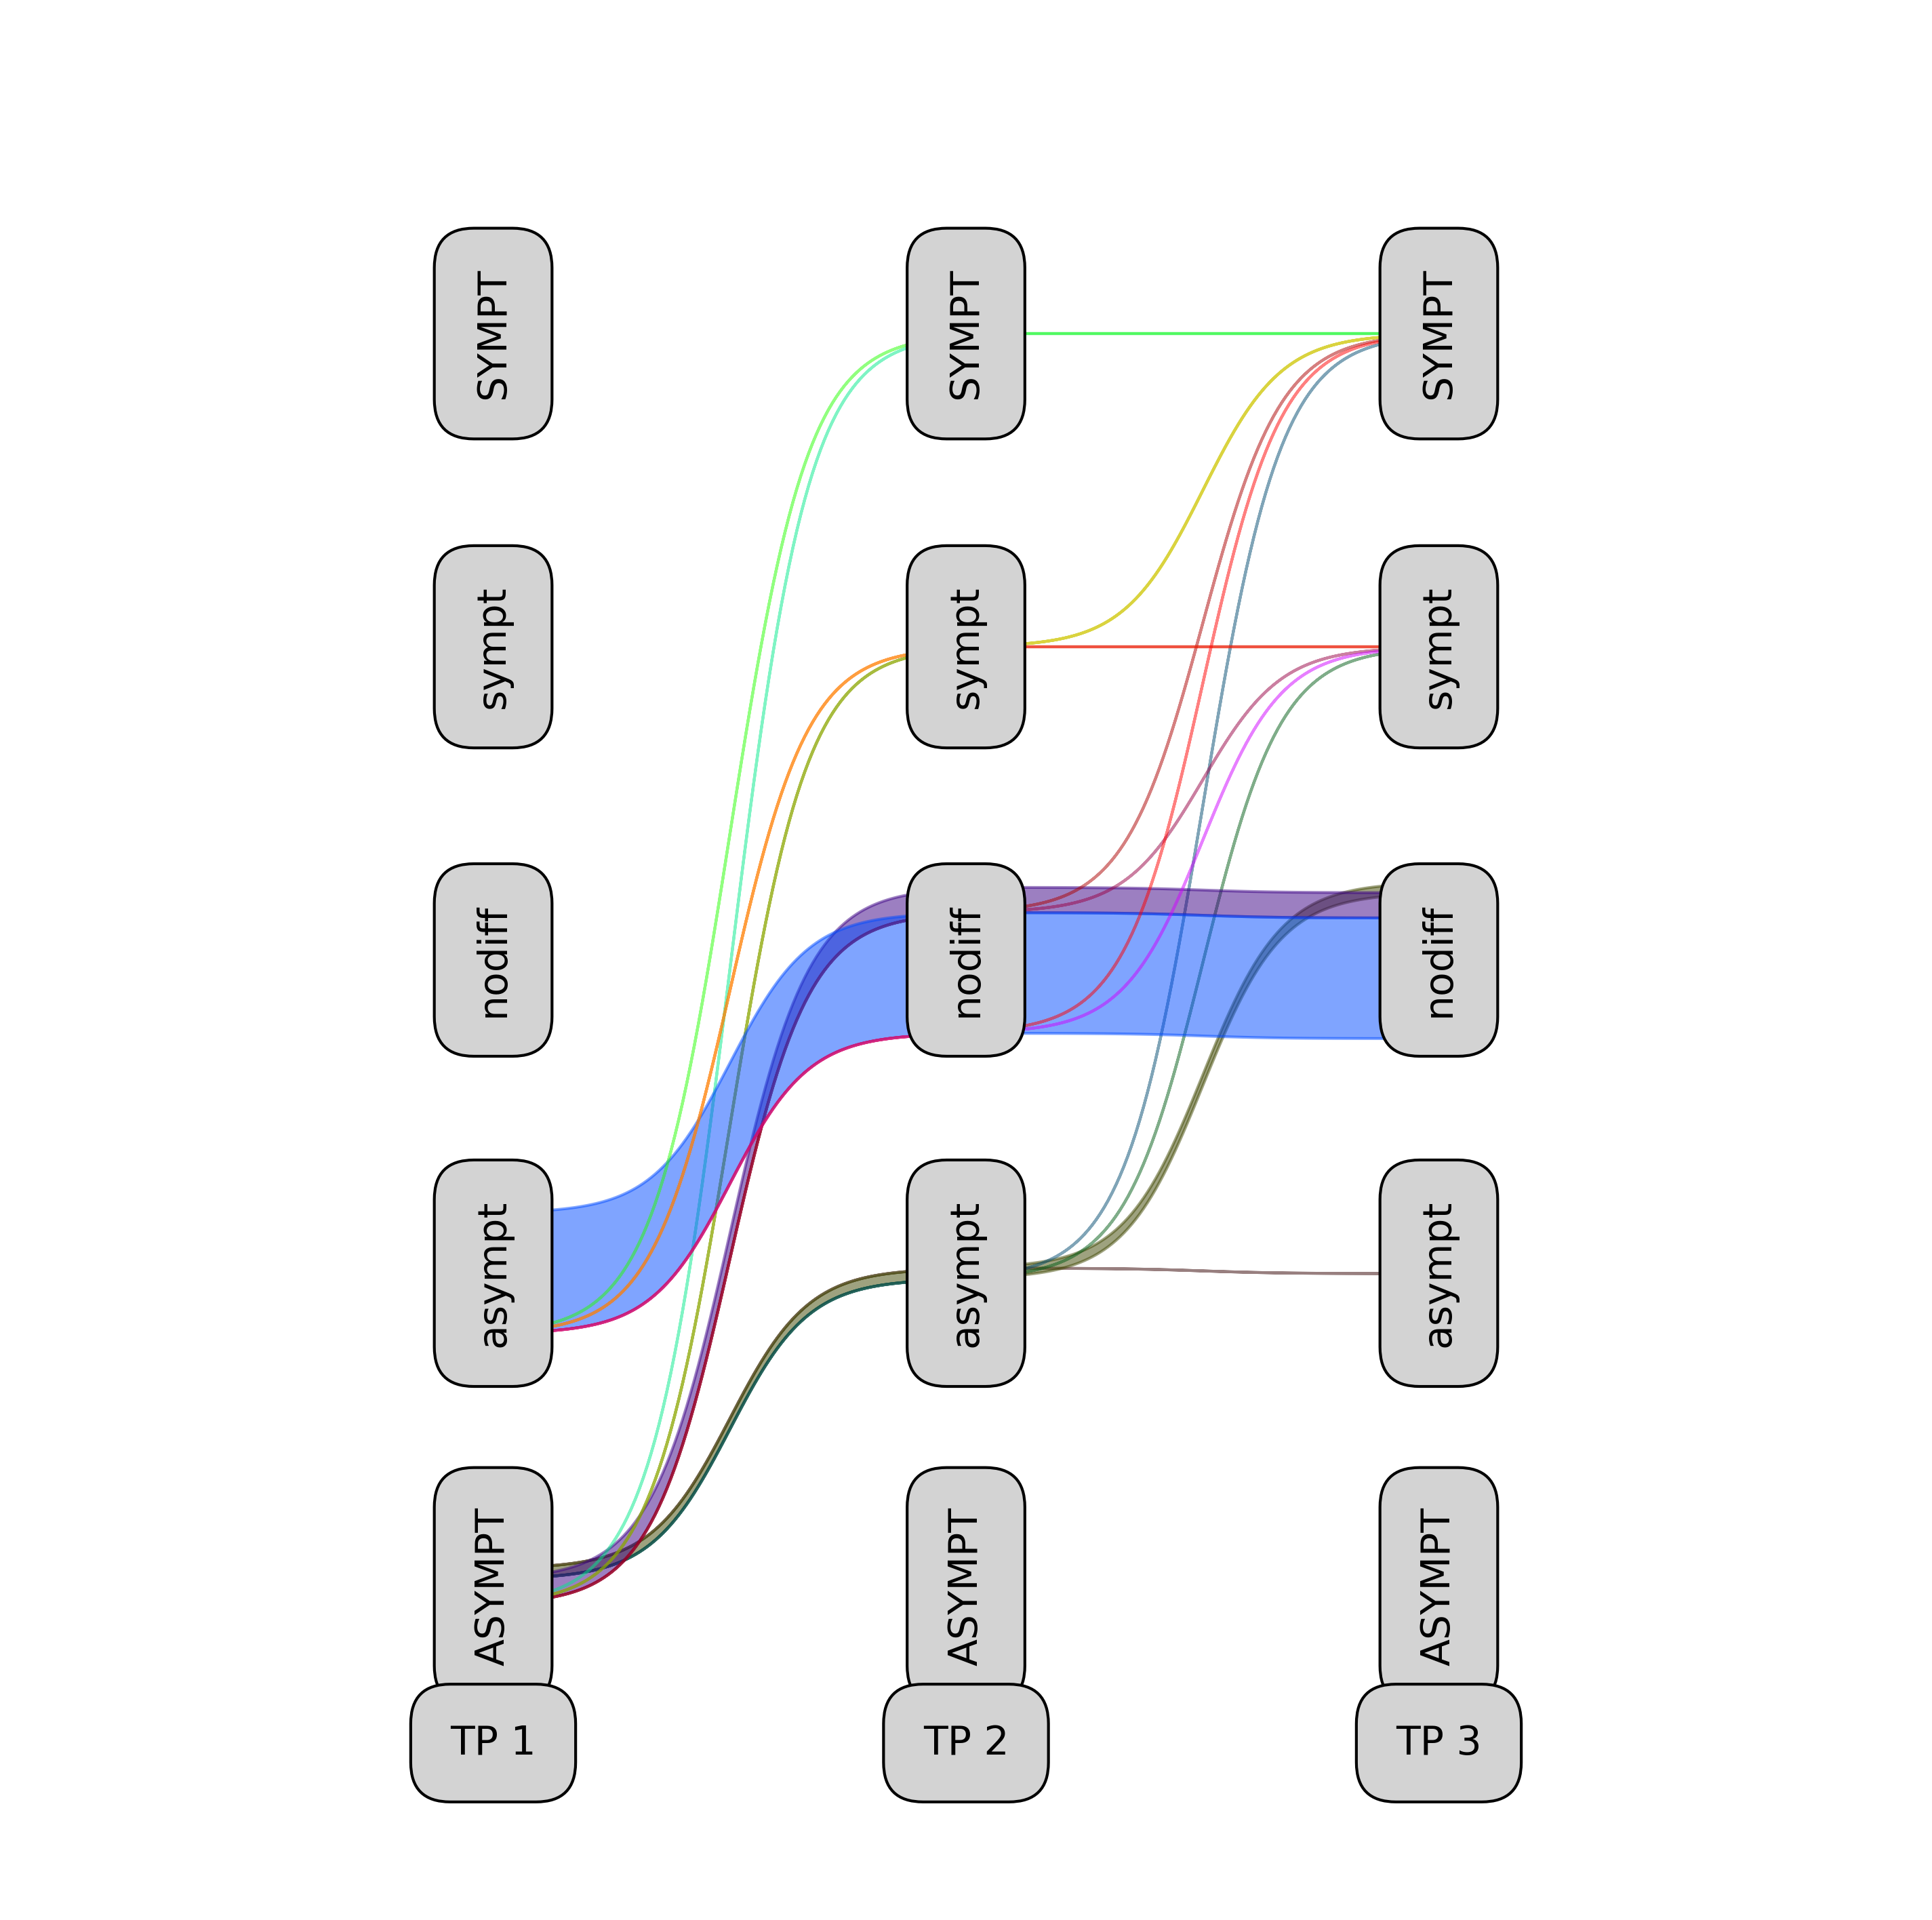

In [24]:
fa.plot_flows(use_flows=relFlowsAsympt)


Figure Size (12, 12)


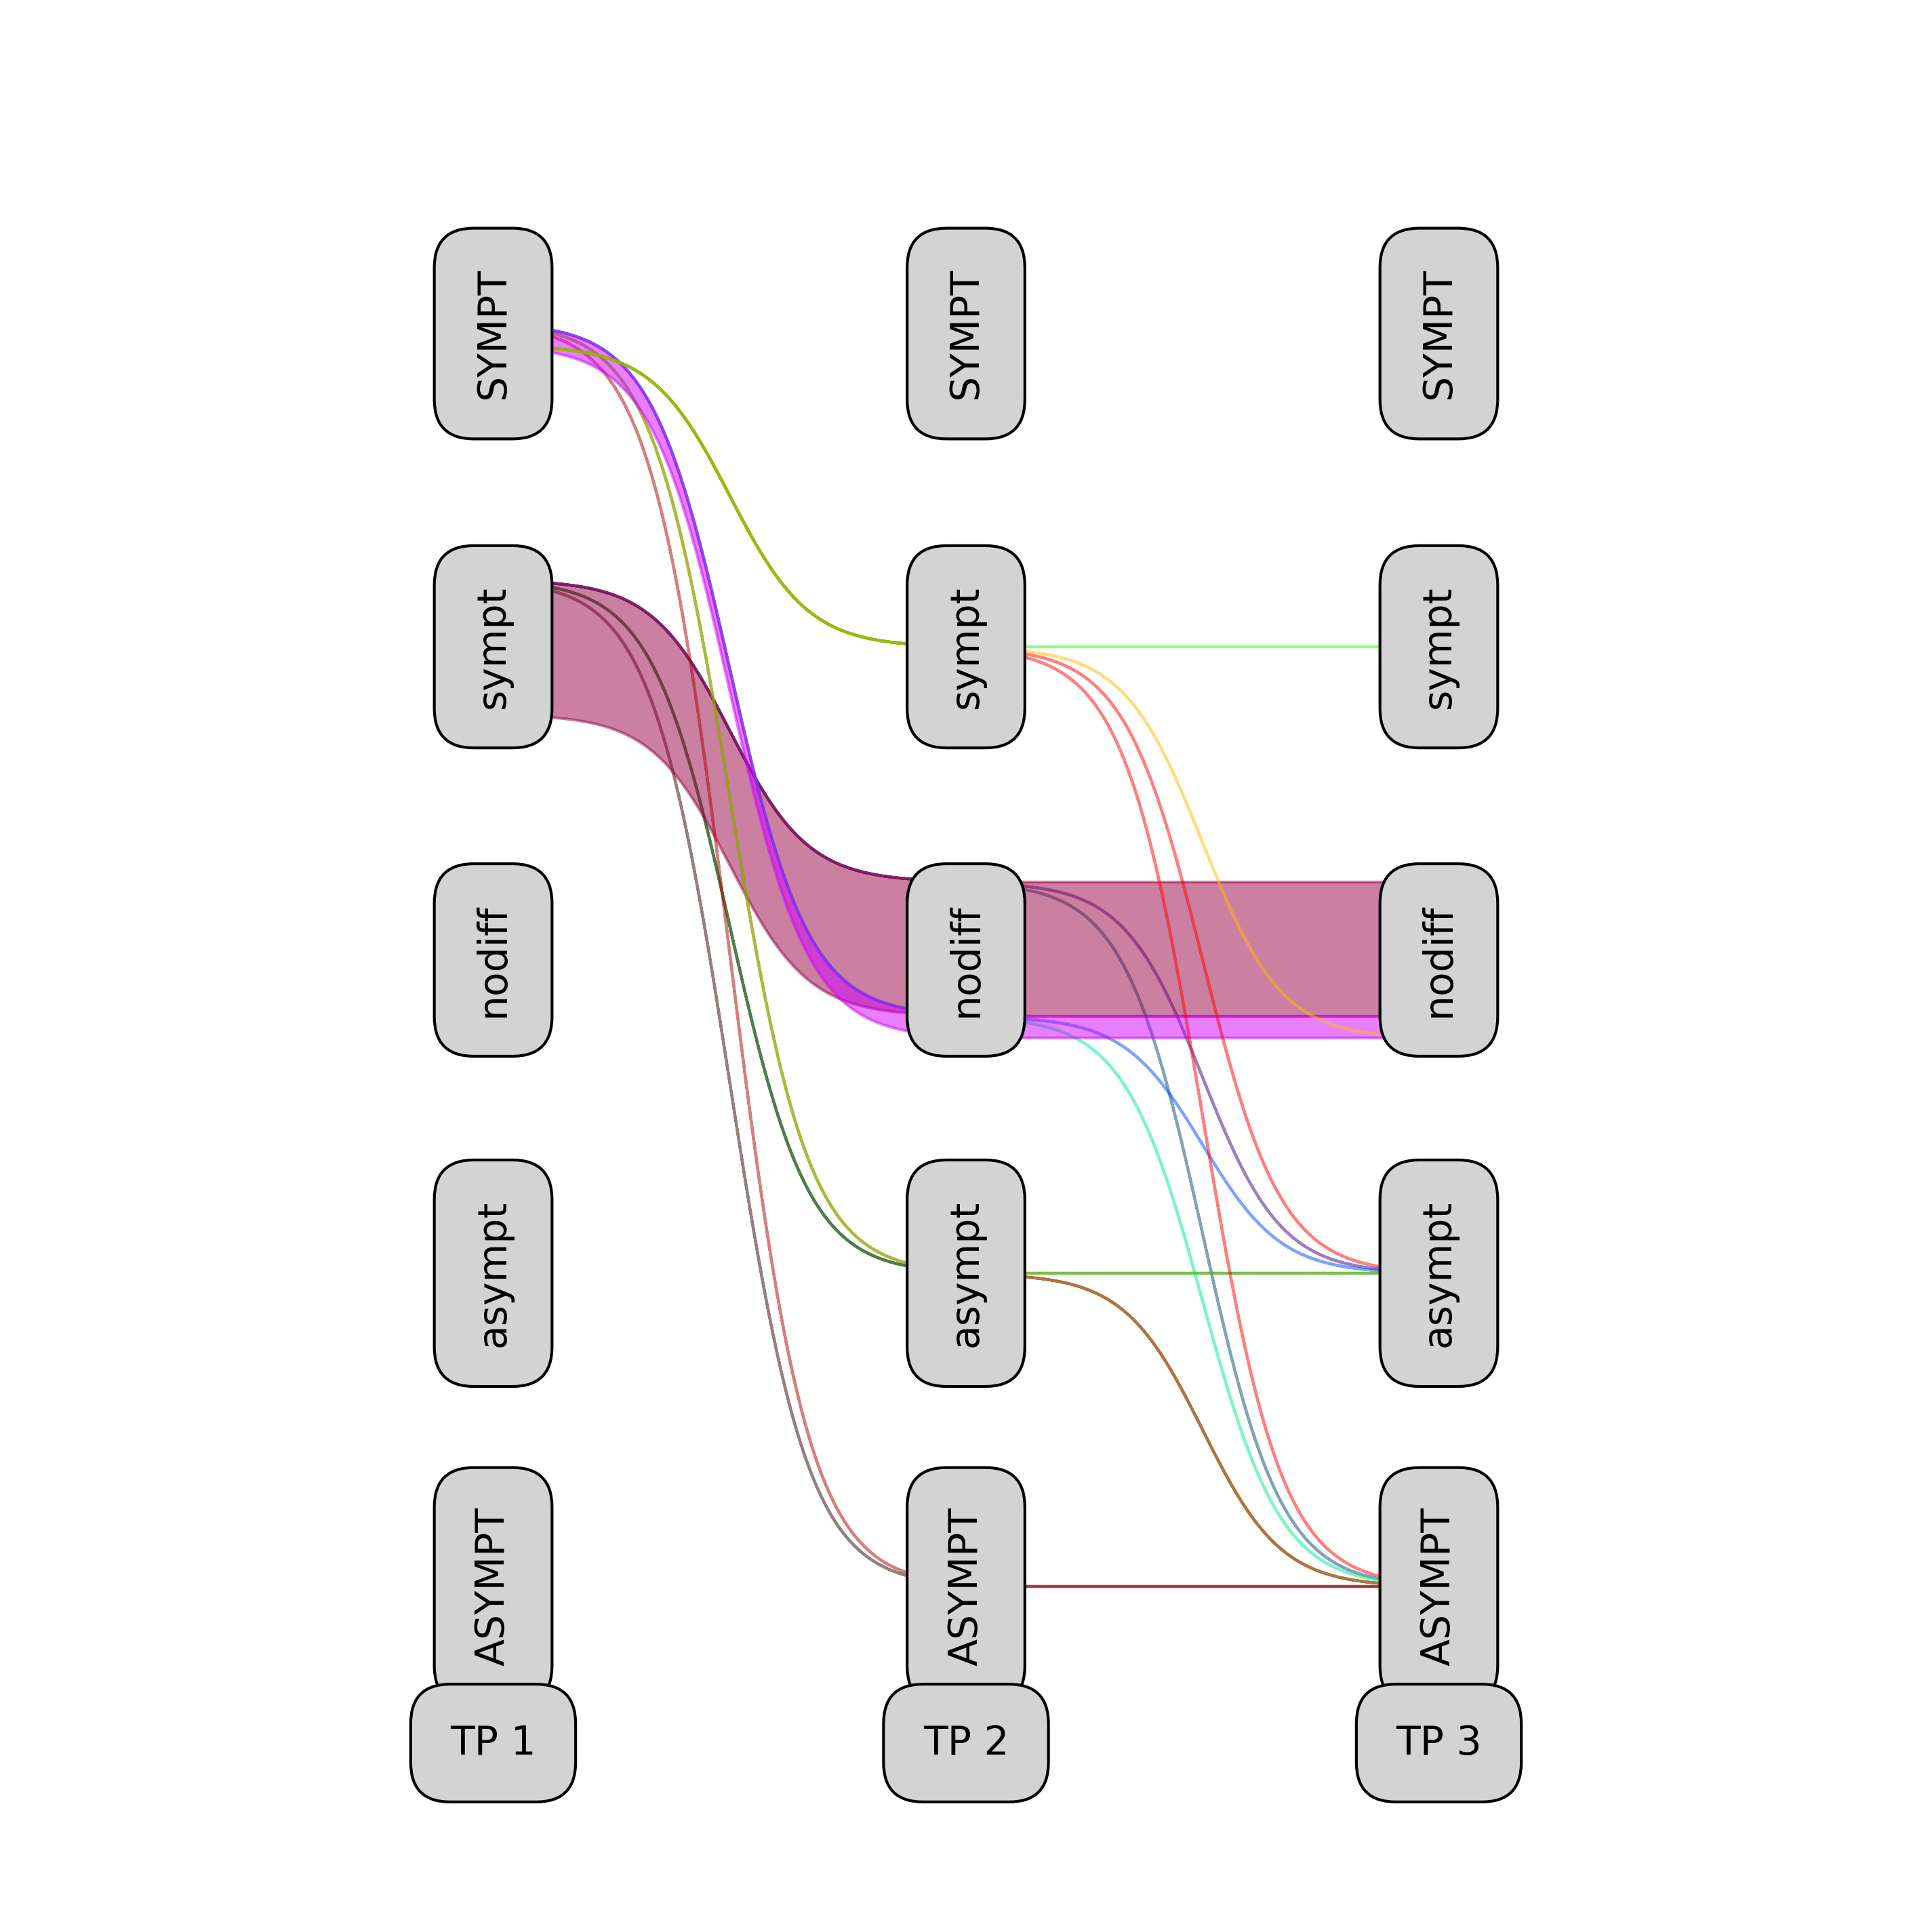

In [25]:
fa.plot_flows(use_flows=relFlowsSympt)

Figure Size (12, 12)


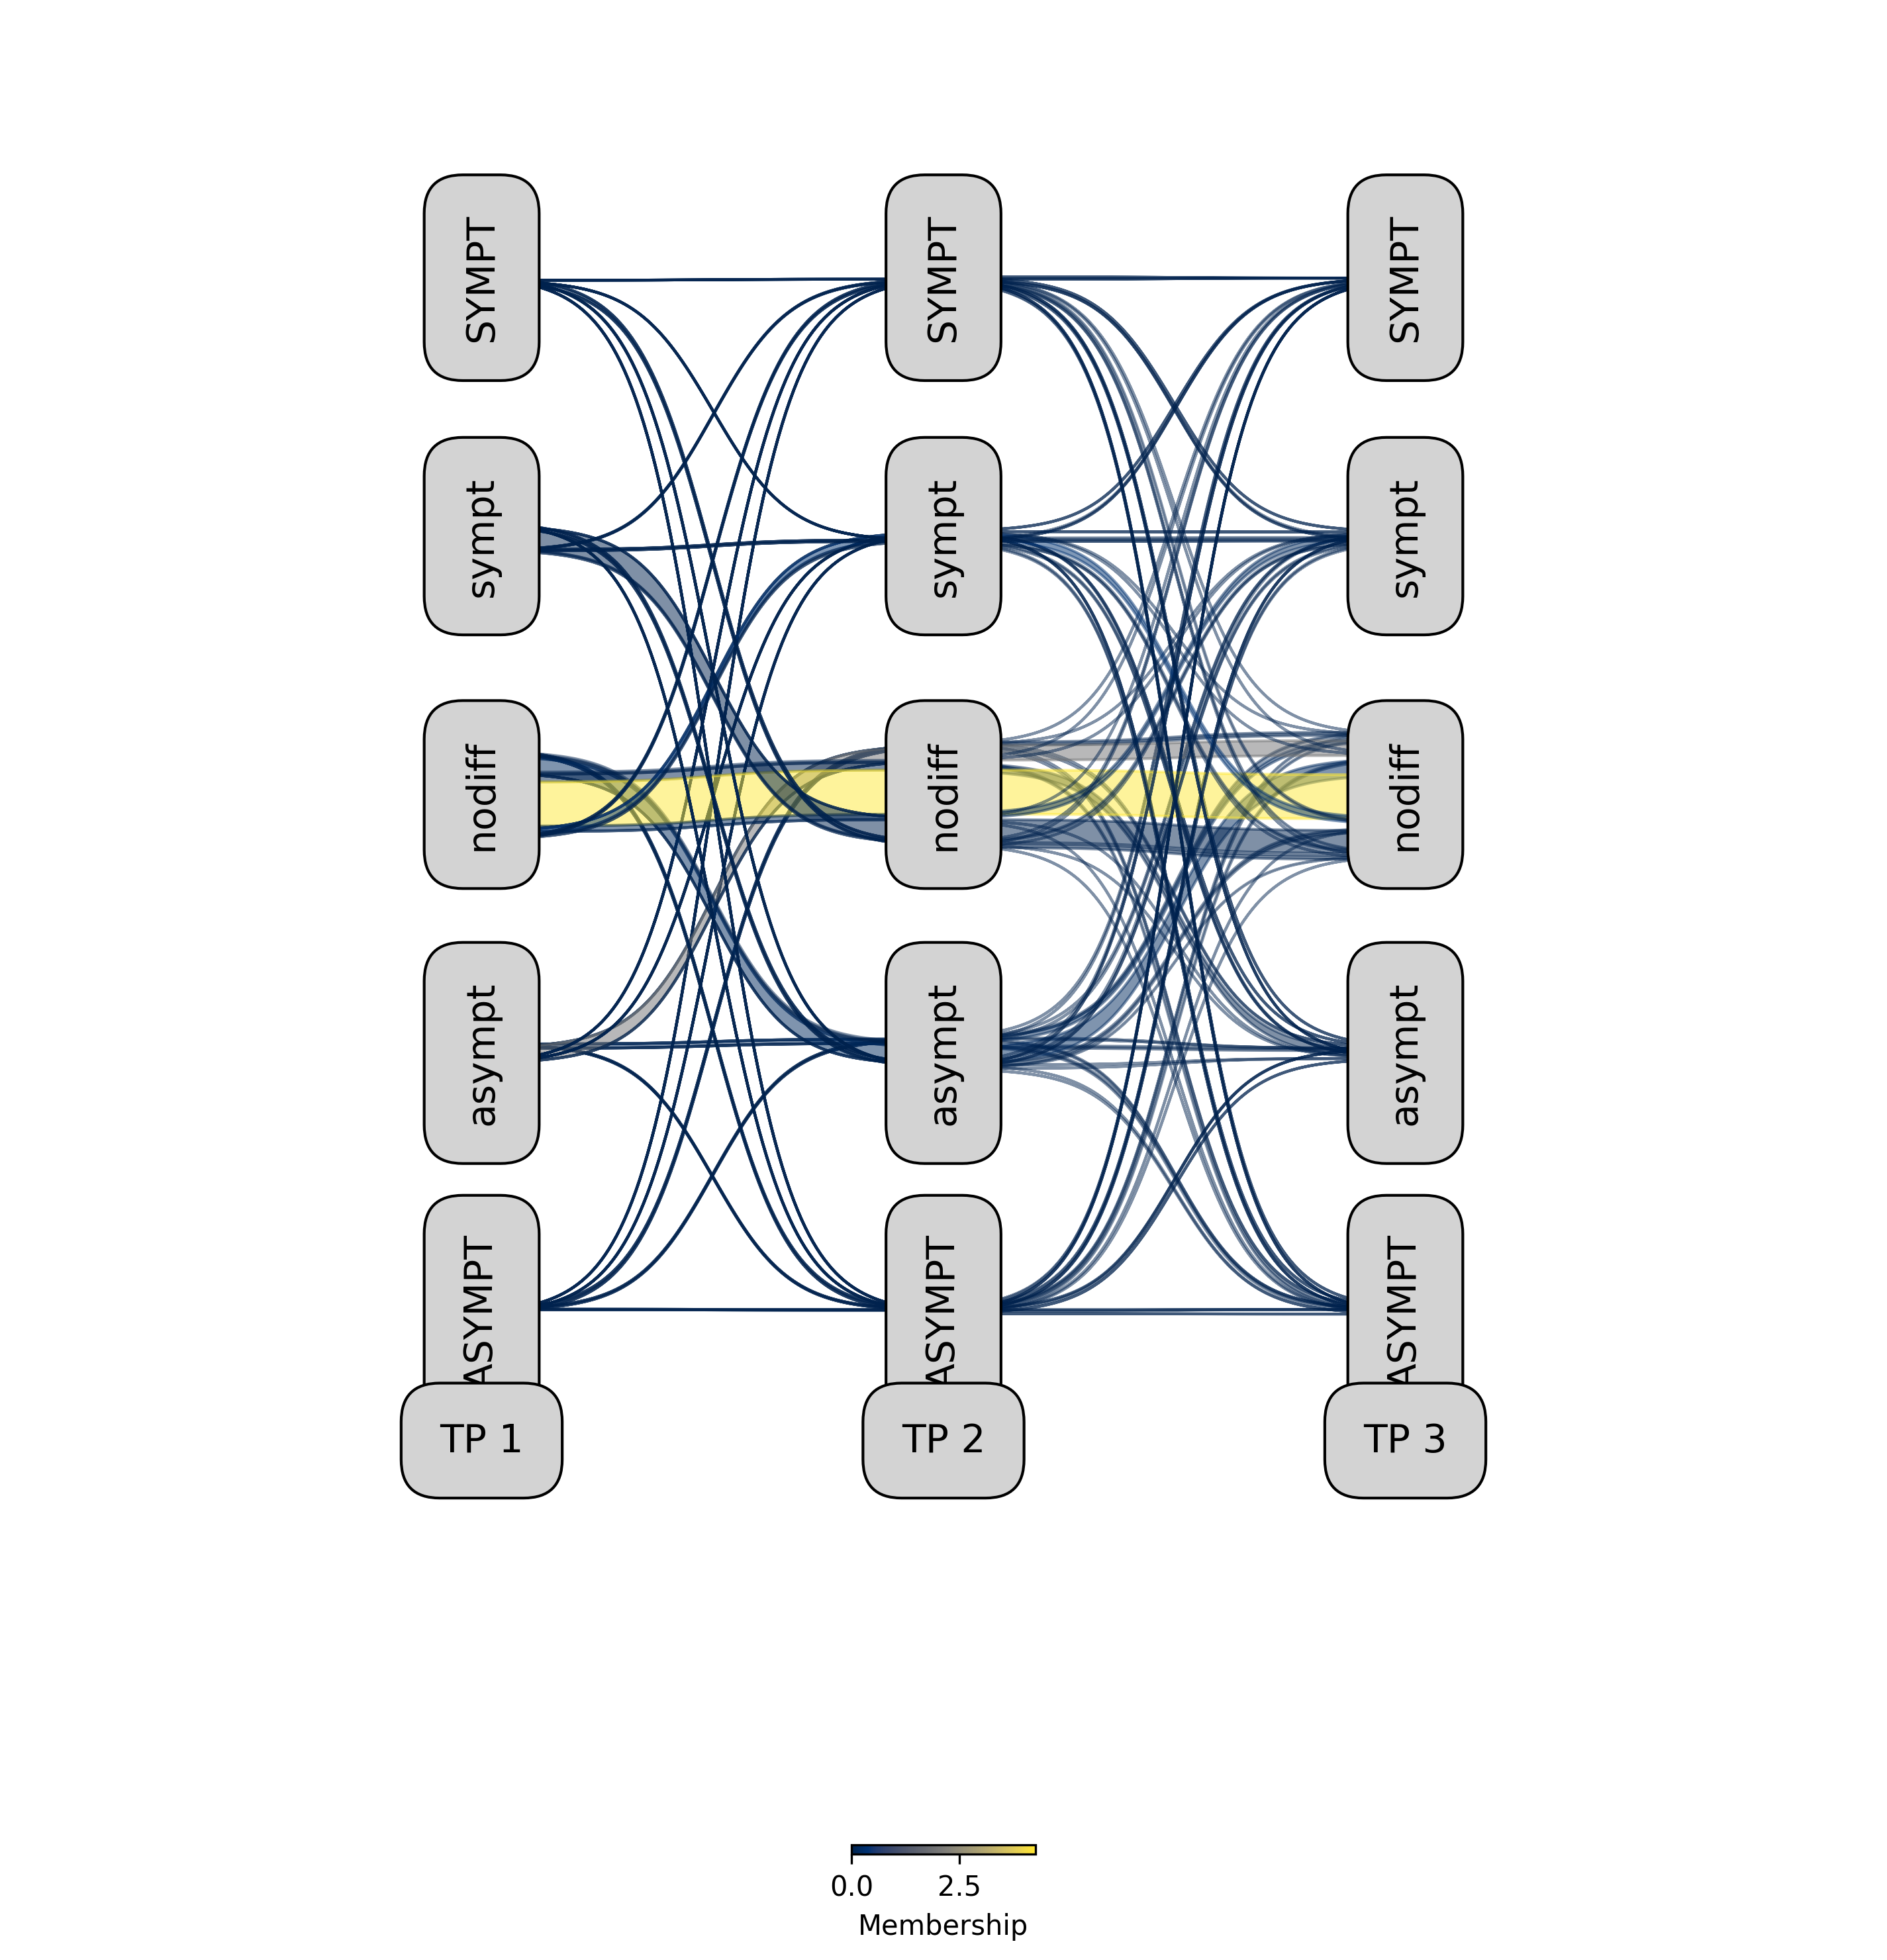

In [26]:
fa.visualize_genes(genes=isgListLong)

Figure Size (8, 20)


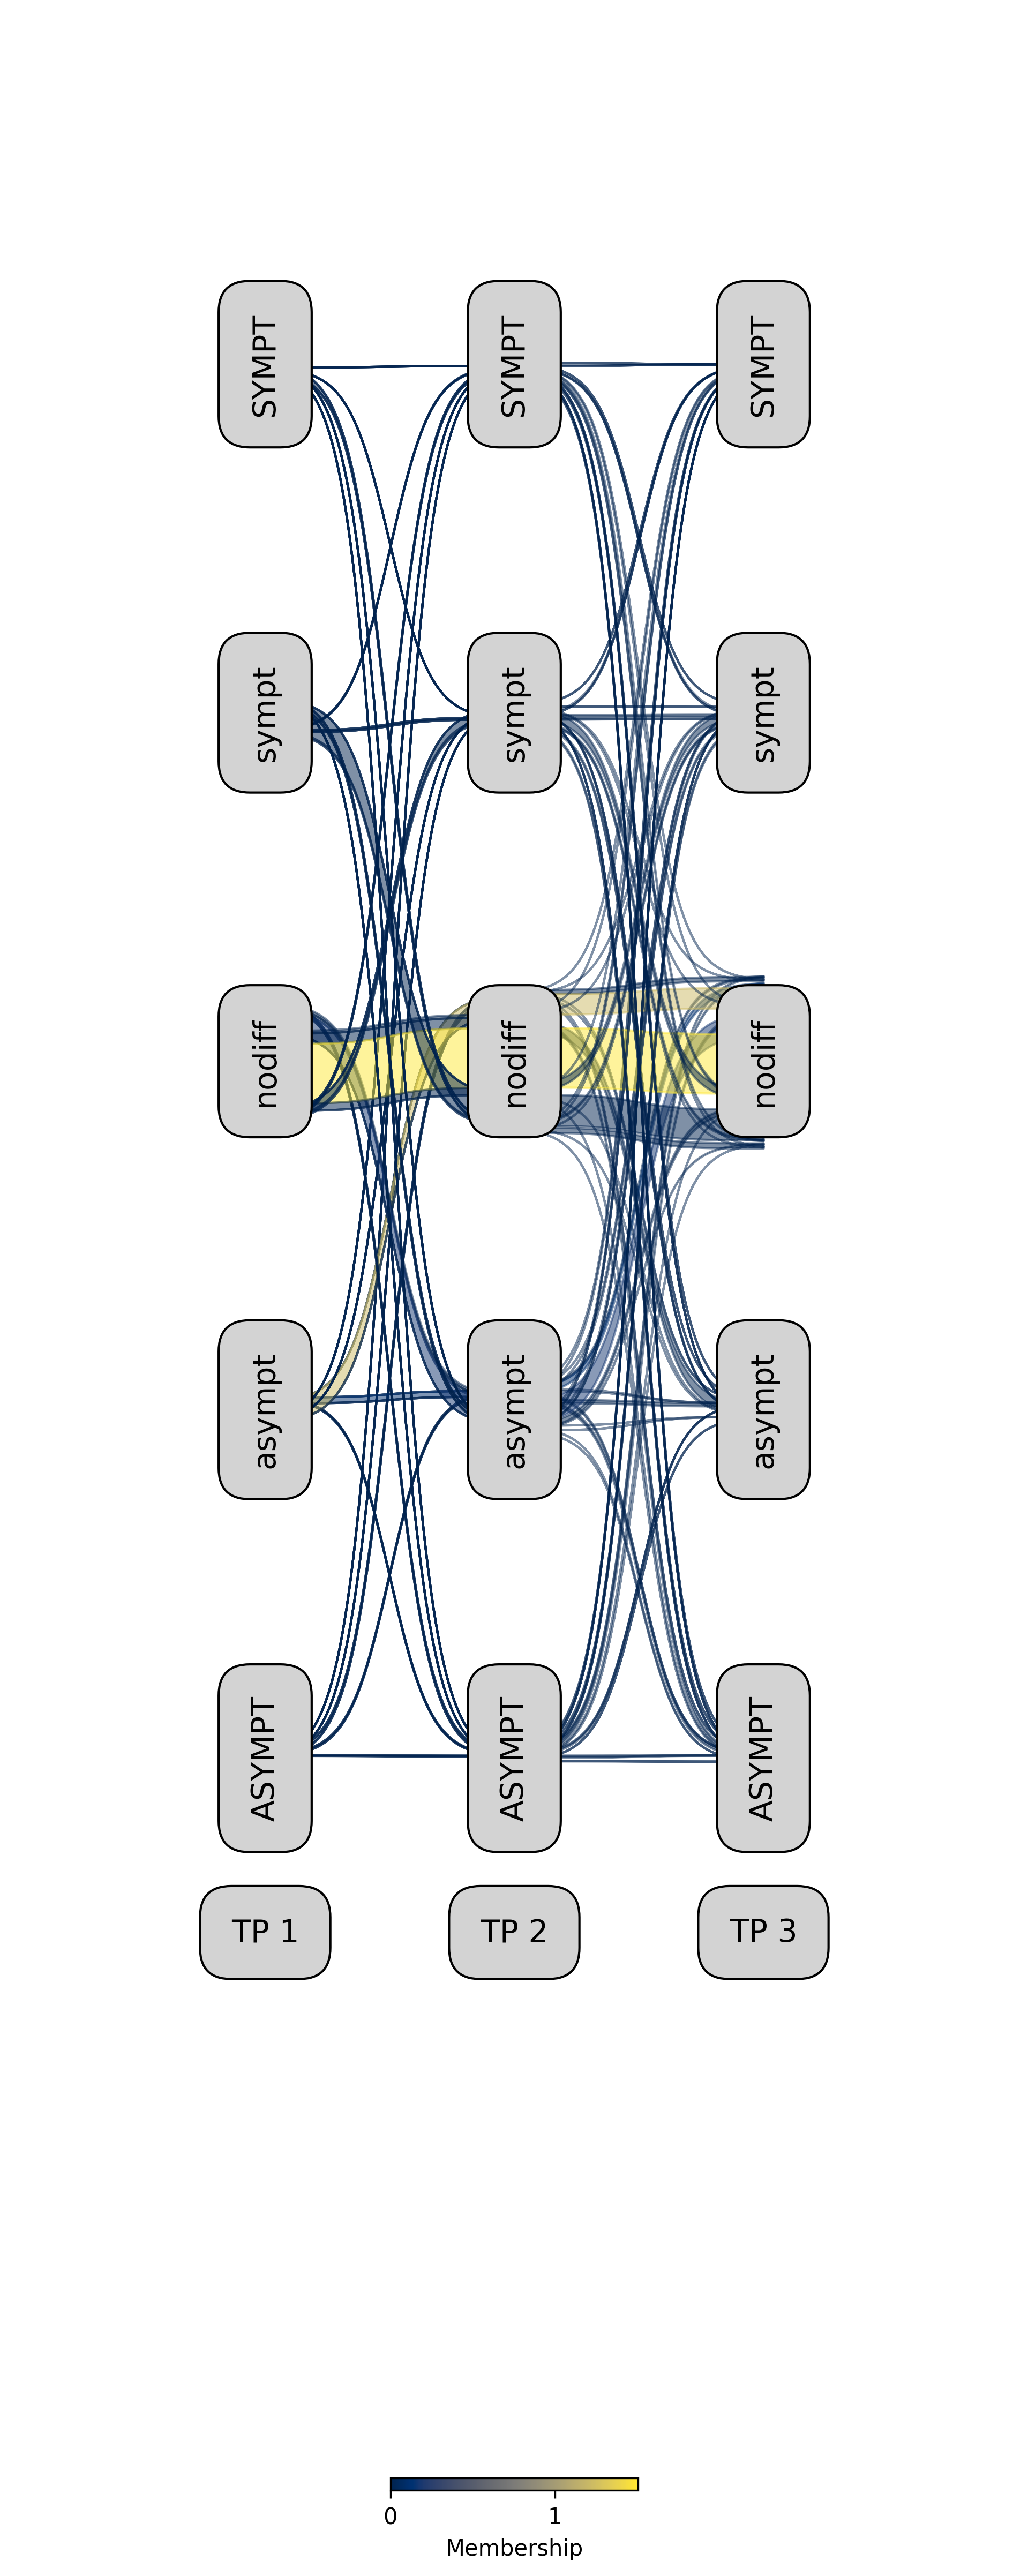

In [27]:
fa.visualize_genes(genes=isgListShort, figsize=(8,20), outfile="plots/ddiff_isgshort_flows")

<Figure size 1800x1800 with 0 Axes>

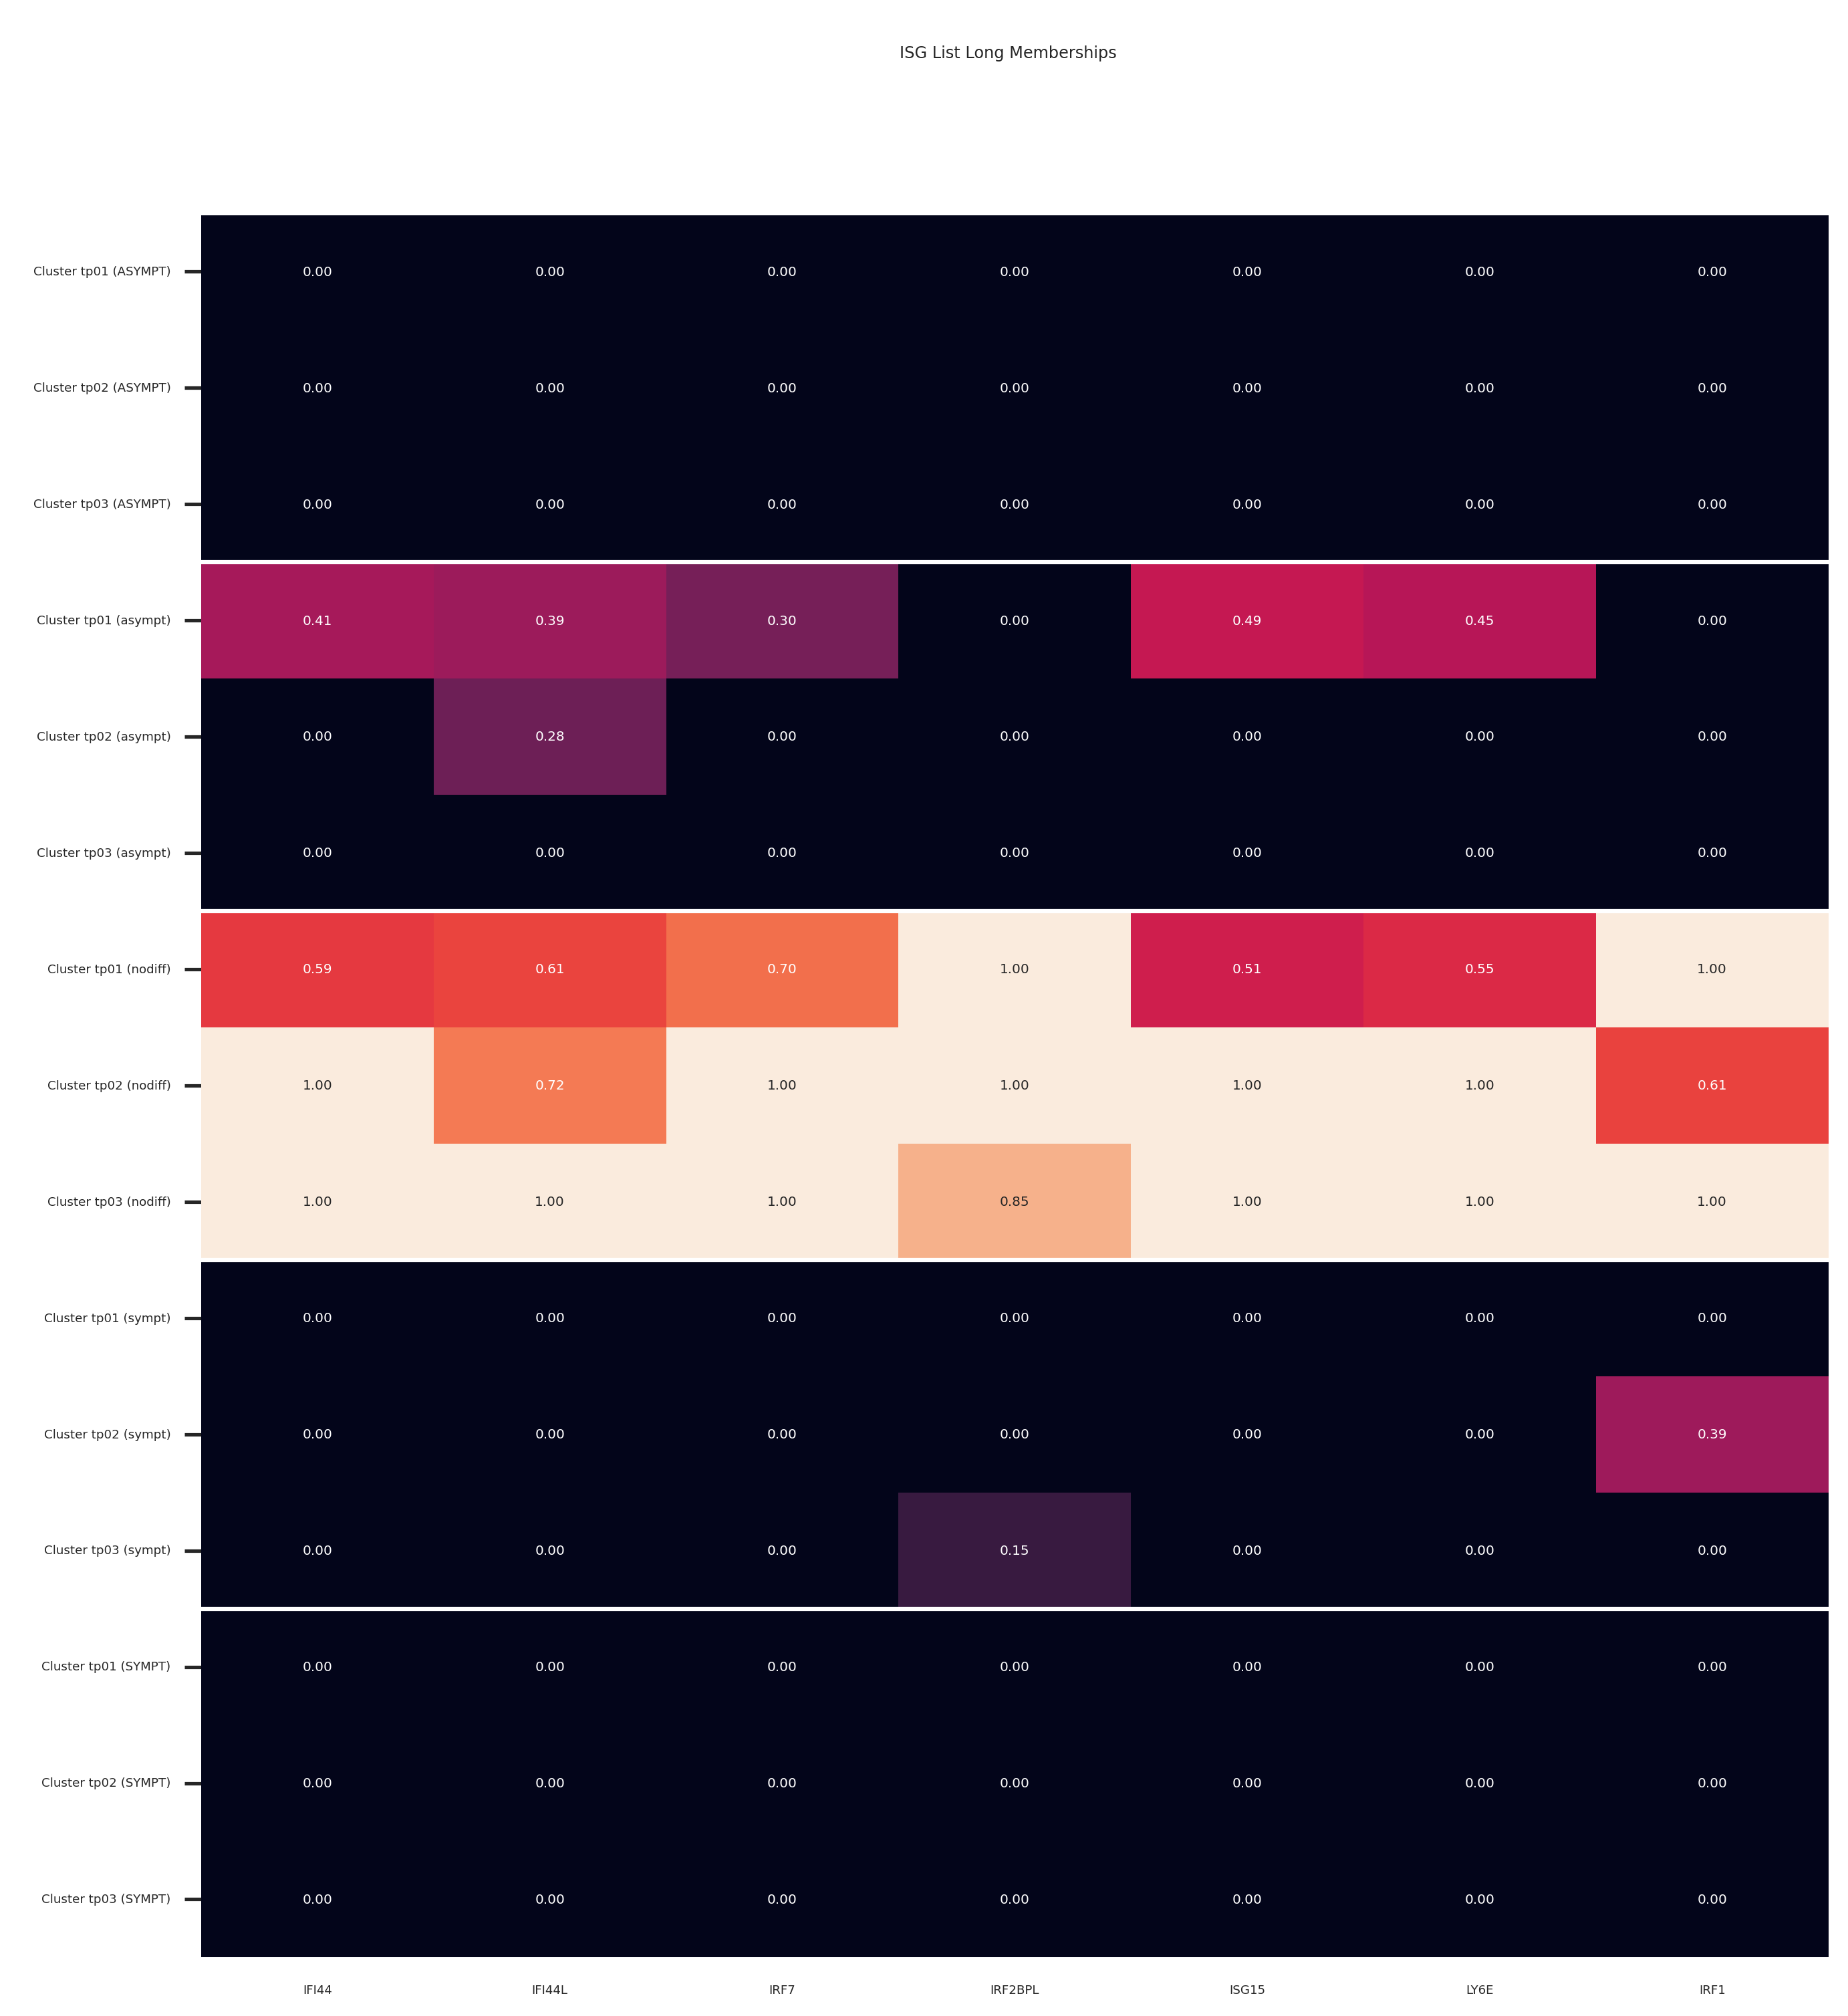

In [28]:
_=fa.plot_state_memberships(genes=isgListLong, name="ISG List Long Memberships", outfile="plots/ddiff_isg_memberships")

Figure Size (12, 12)


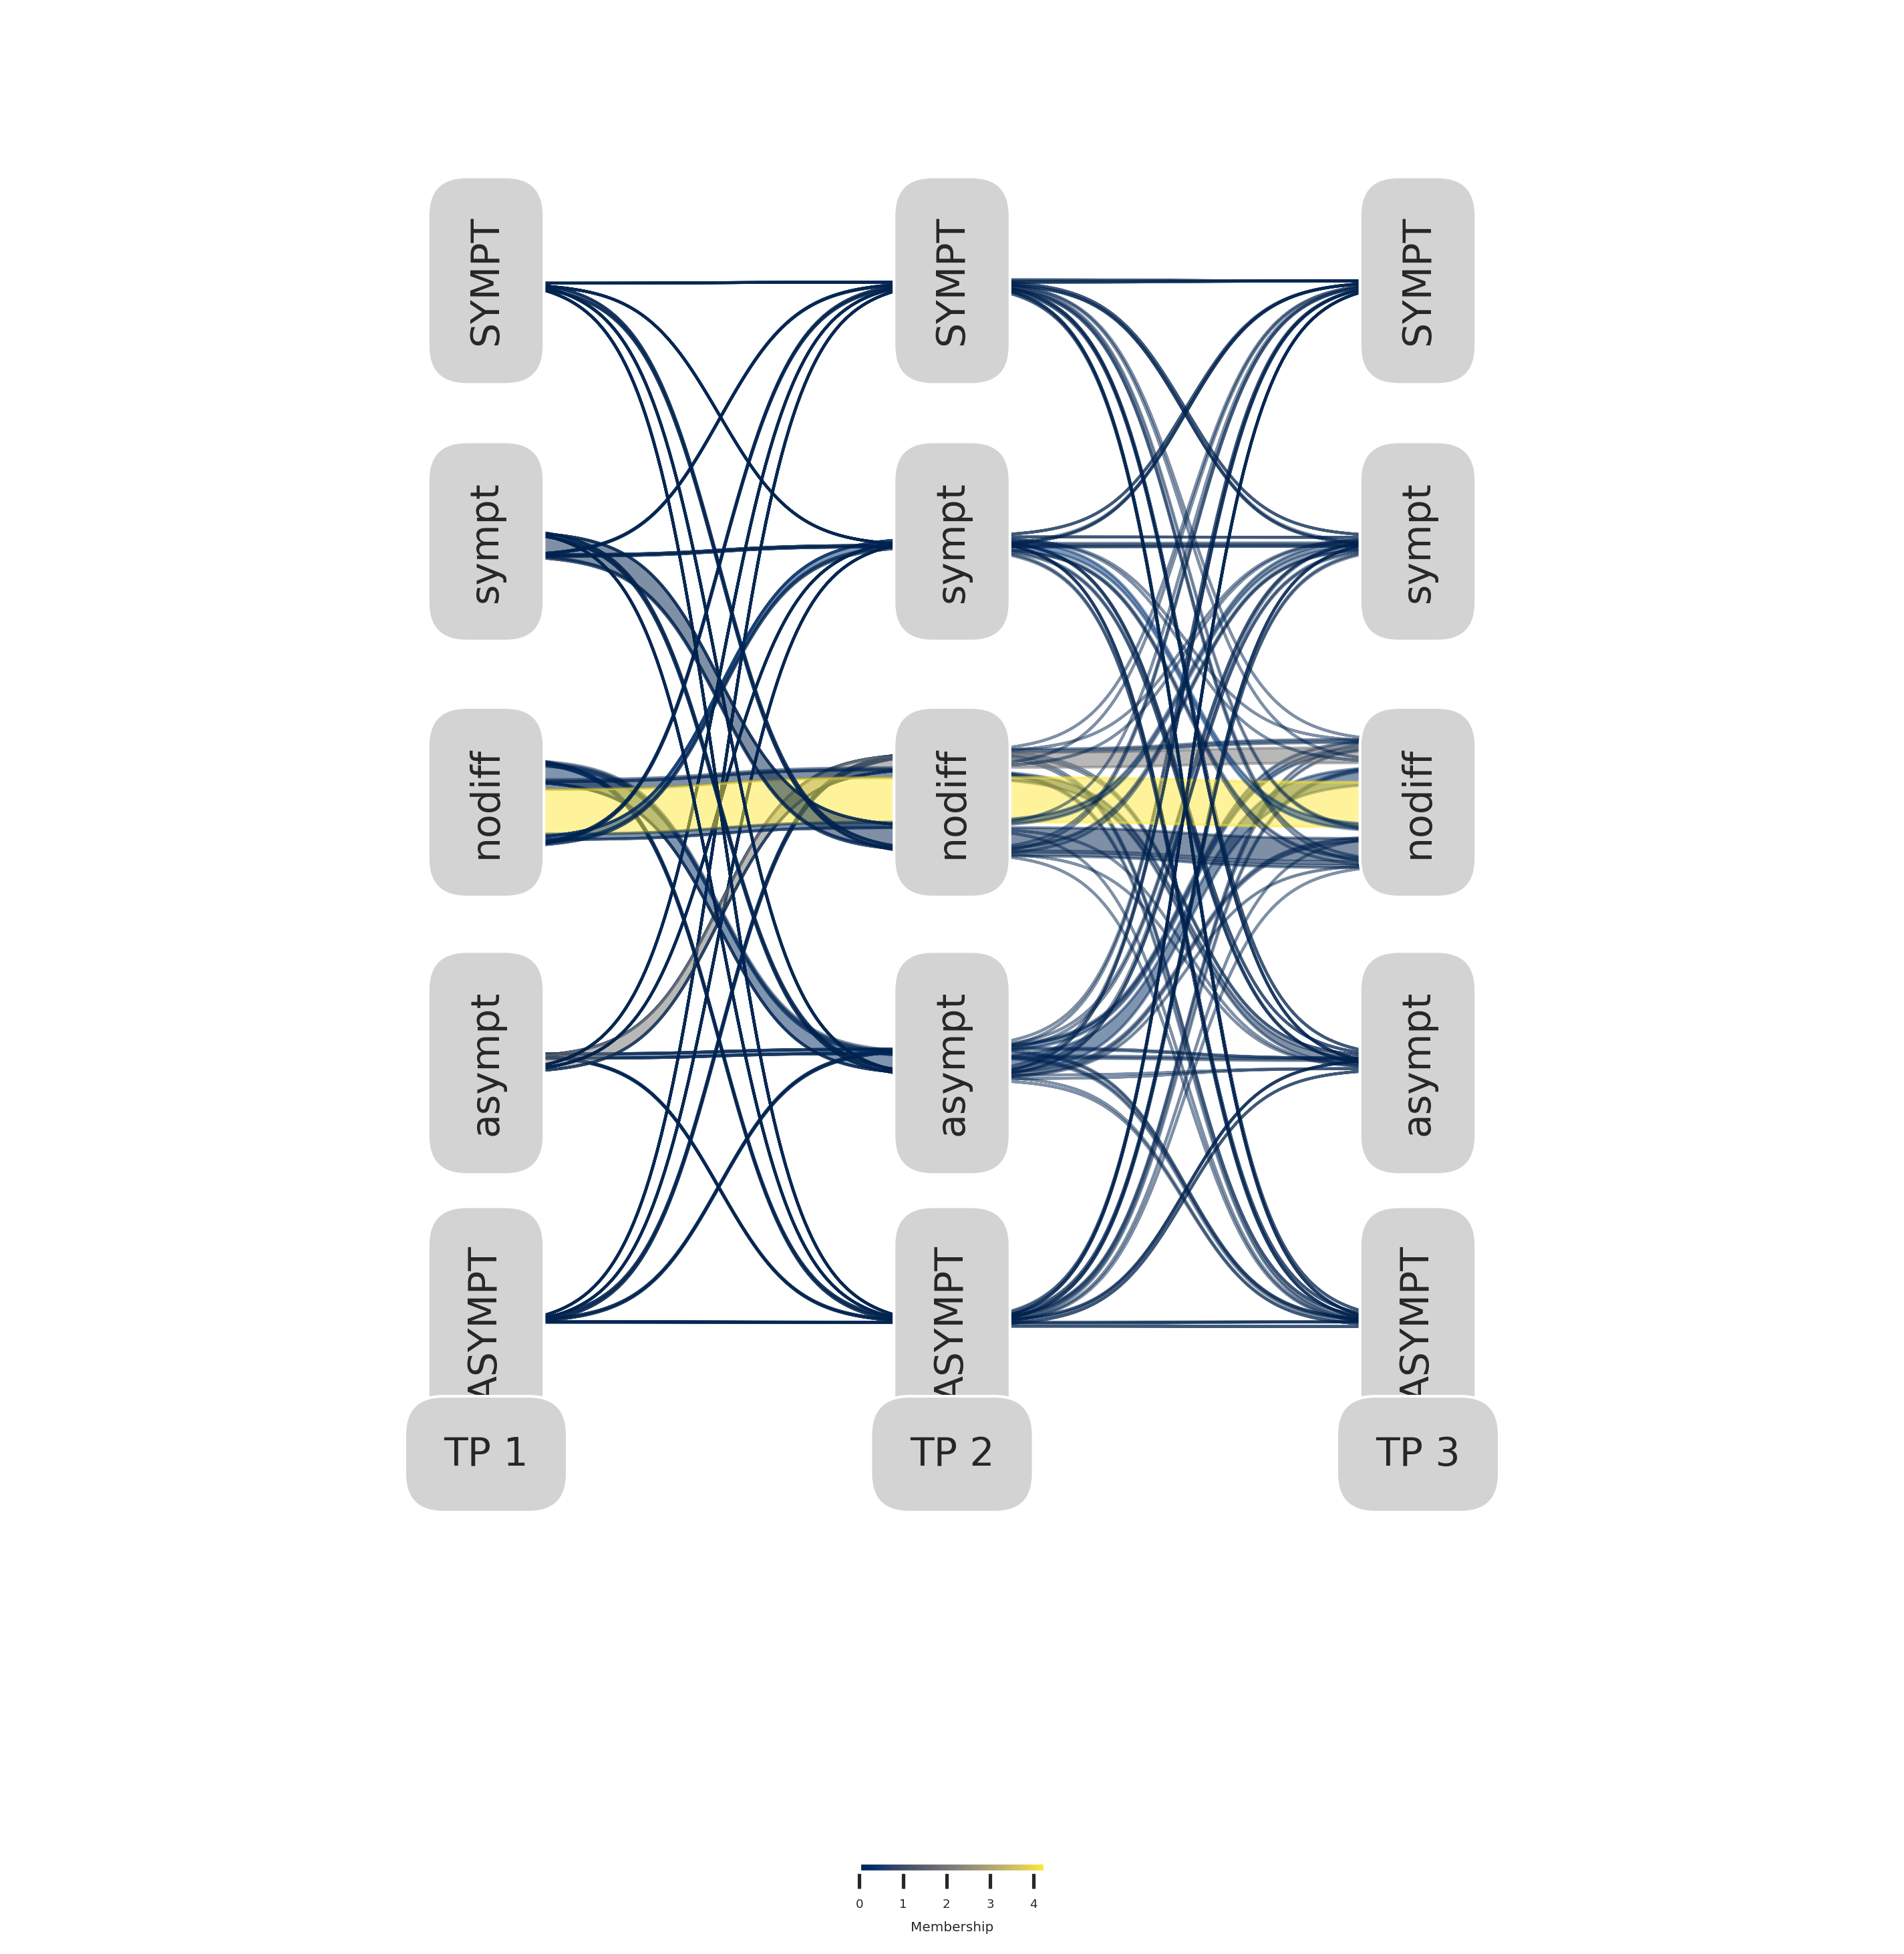

In [29]:
fa.visualize_genes(genes=isgListLong)